(64, 4049)
(64, 3305)
(64, 1921)
(54, 1920)
(4, 1920)
(54, 39915)
(4, 39915)


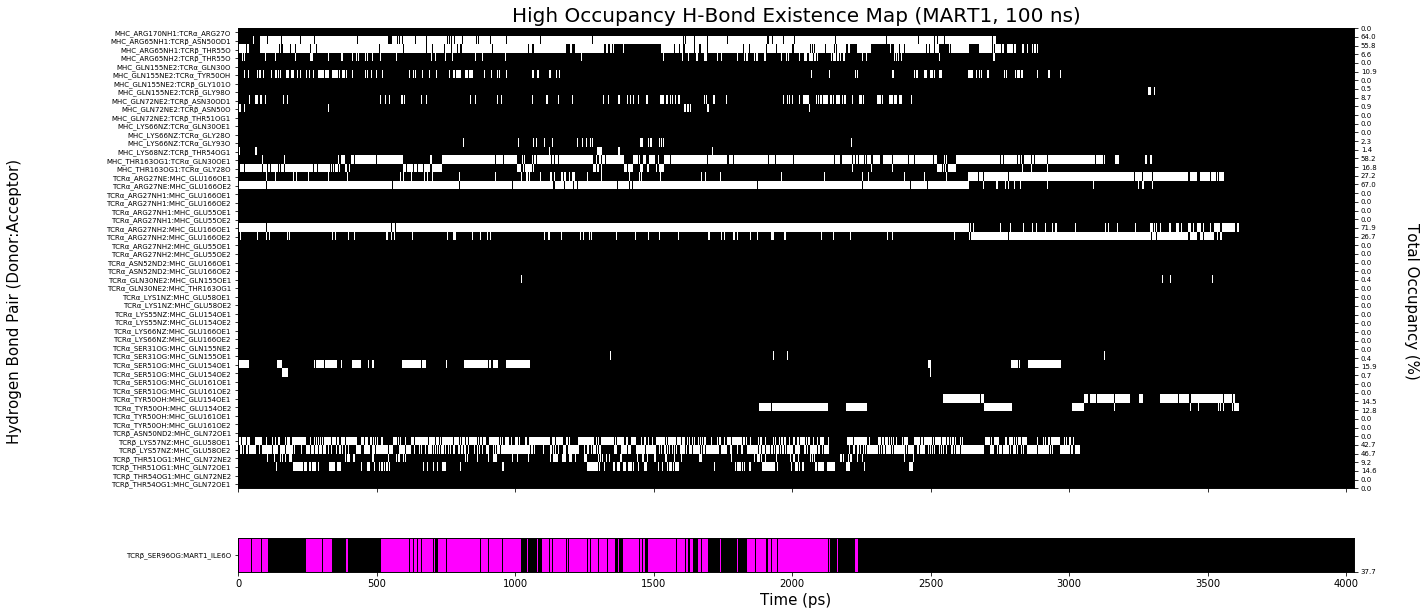

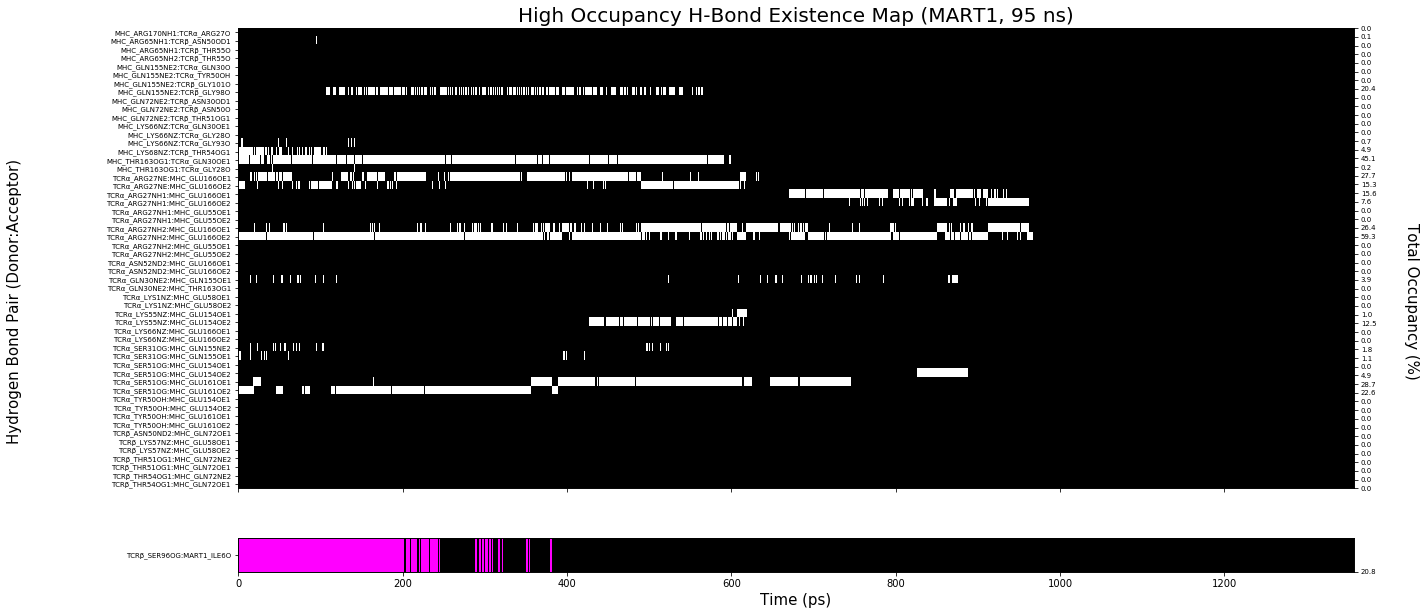

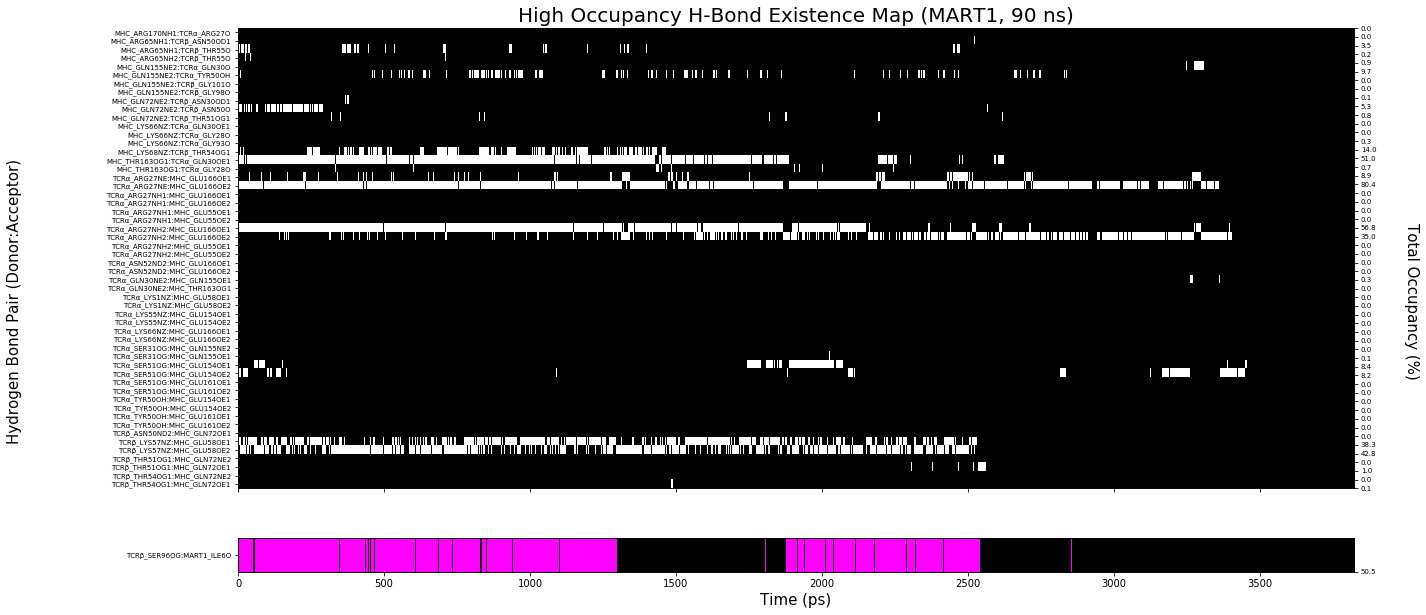

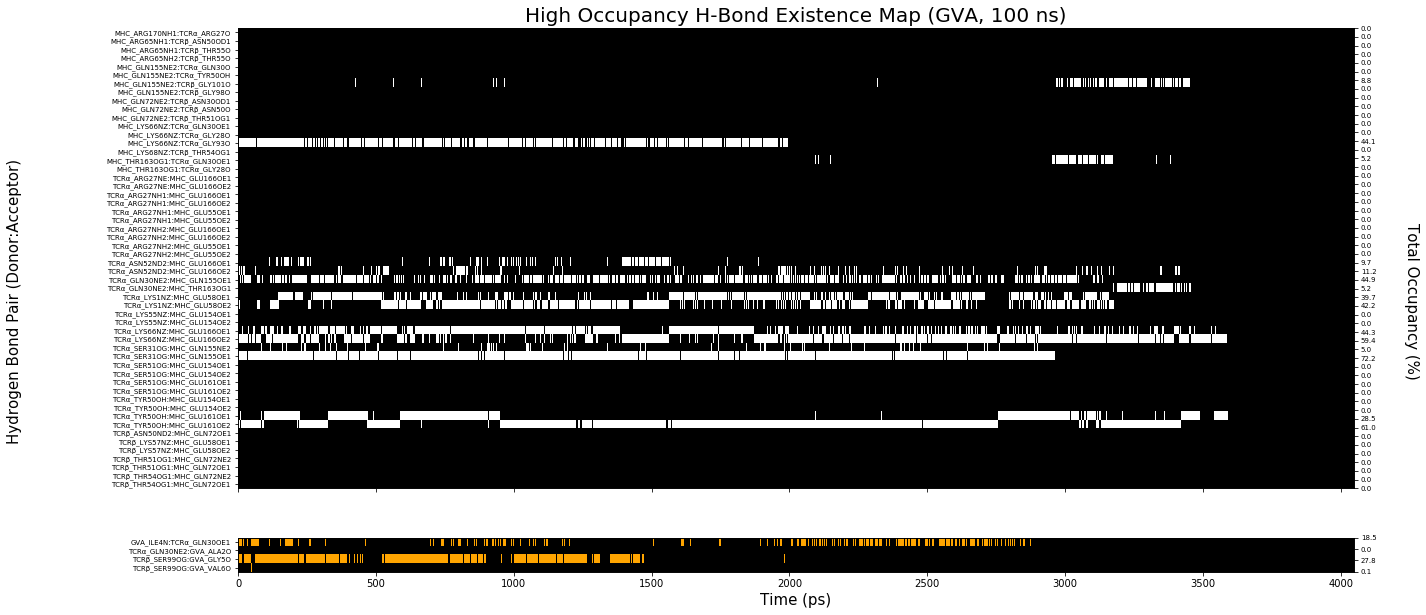

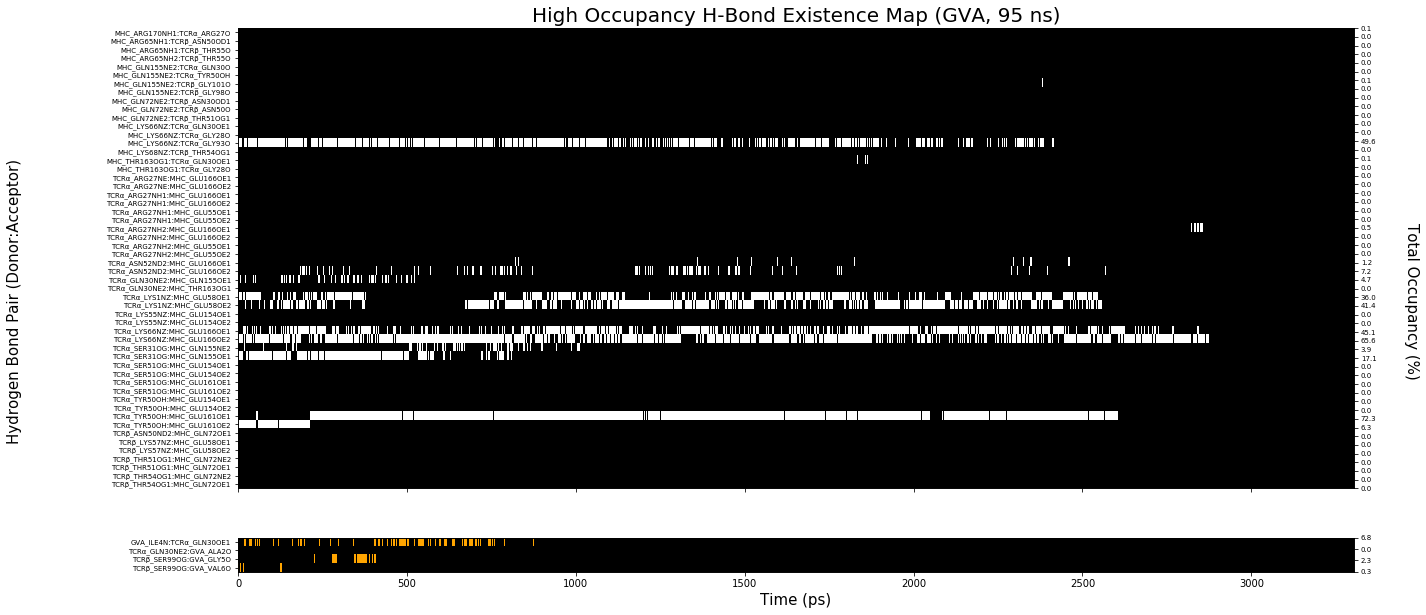

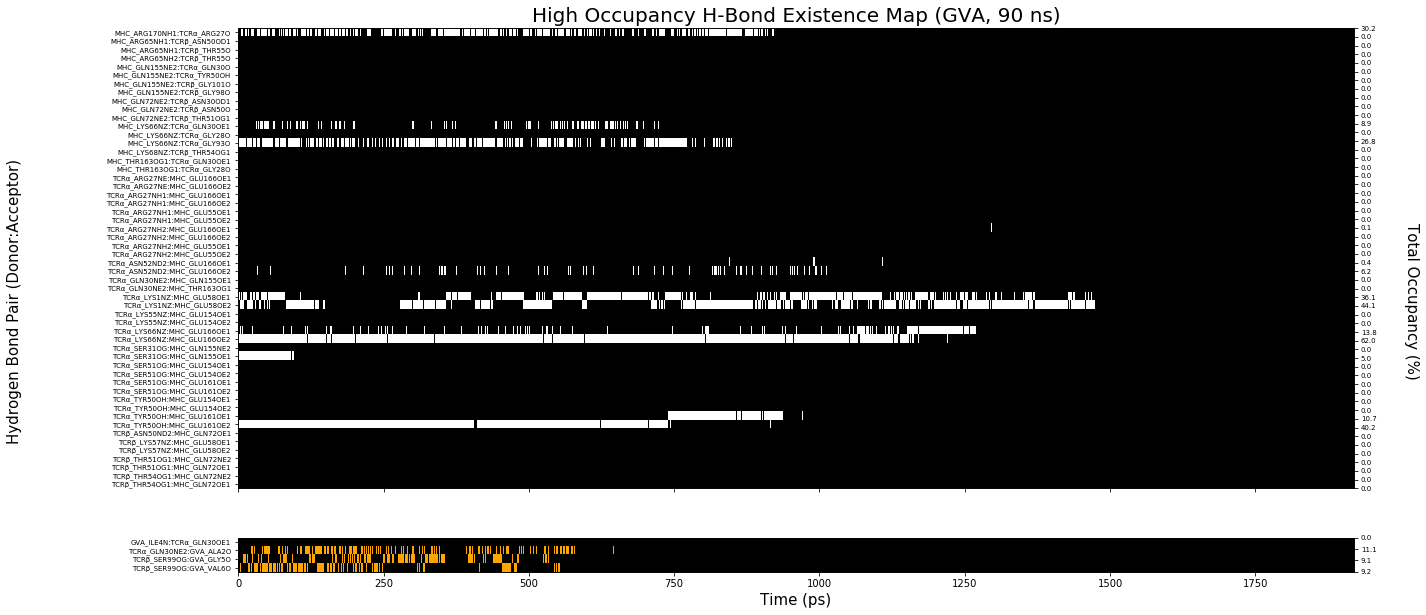

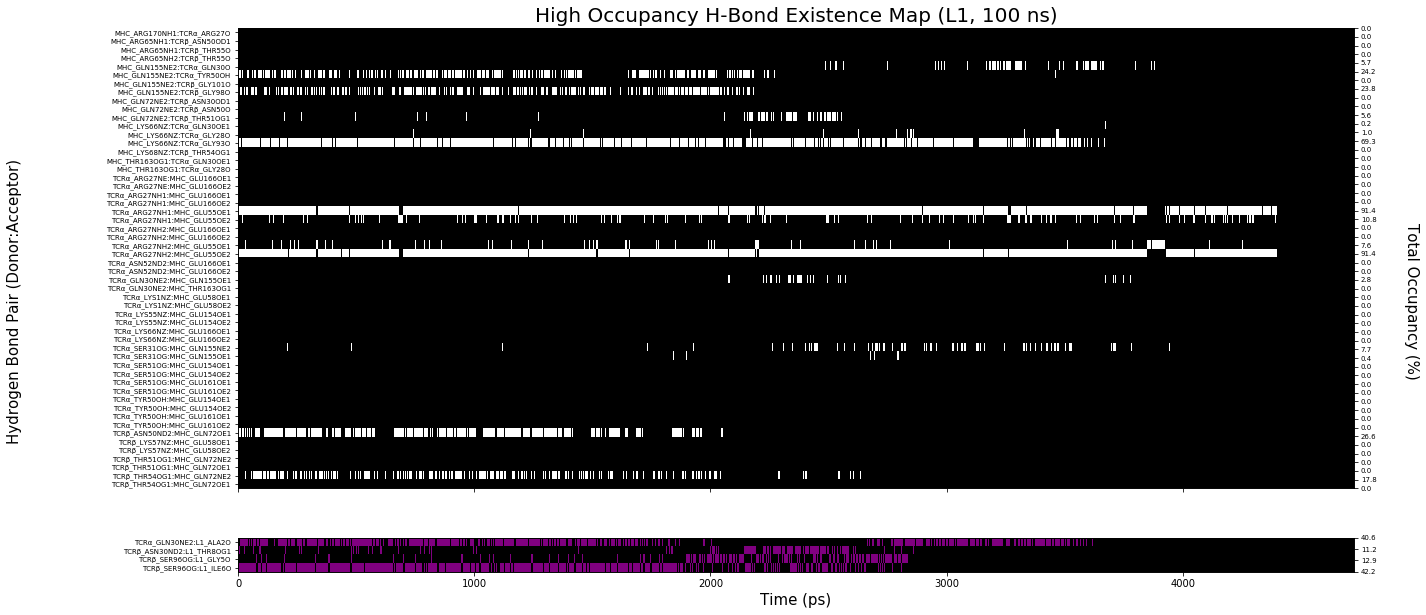

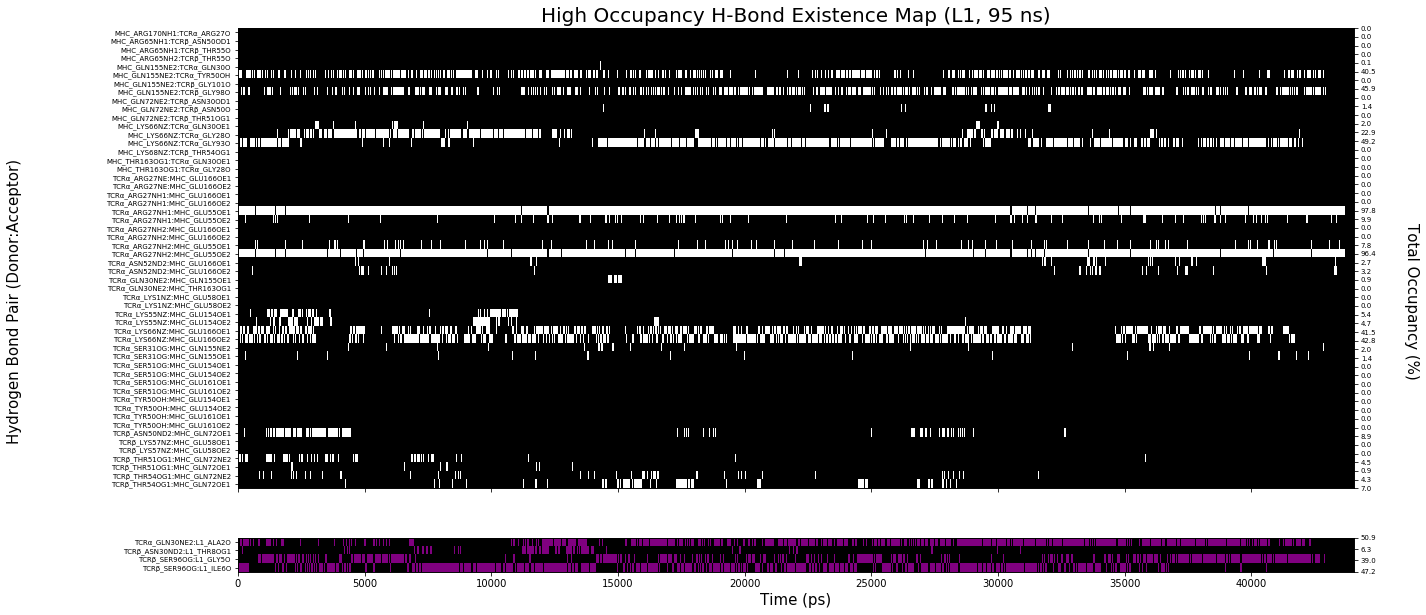

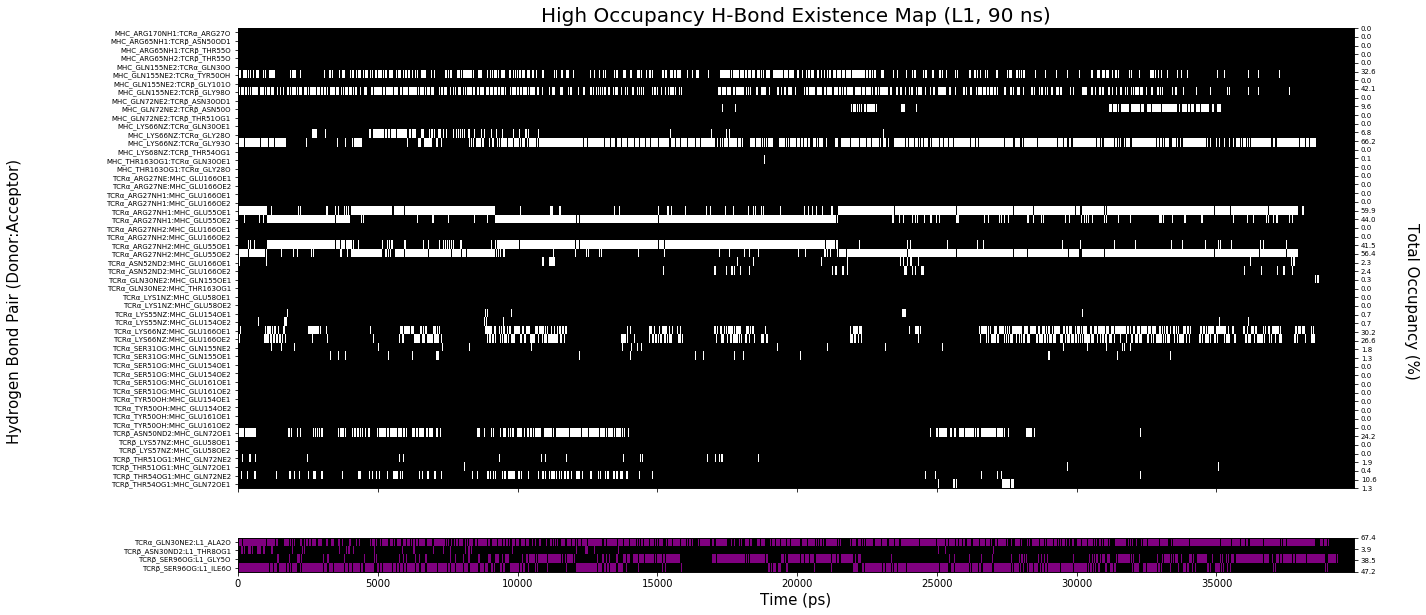

In [30]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

#Let's map it up, homie!

M1_100 = pd.read_excel(r'/Users/zrollins/Box/DMF5_MART1/M1+/100/hmap.xlsx', index_col = 0)
M1_95 = pd.read_excel(r'/Users/zrollins/Box/DMF5_MART1/M1+/95/hmap.xlsx', index_col = 0)
M1_90 = pd.read_excel(r'/Users/zrollins/Box/DMF5_MART1/M1+/90/hmap.xlsx', index_col = 0)
                      
GVA_100 = pd.read_excel(r'/Users/zrollins/Box/DMF5_MART1/GVA+/100/hmap.xlsx', index_col = 0)
GVA_95 = pd.read_excel(r'/Users/zrollins/Box/DMF5_MART1/GVA+/95/hmap.xlsx', index_col = 0)         
GVA_90 = pd.read_excel(r'/Users/zrollins/Box/DMF5_MART1/GVA+/90/hmap.xlsx', index_col = 0)
                       
L1_100 = pd.read_excel(r'/Users/zrollins/Box/DMF5_MART1/L1+/100/hmap.xlsx', index_col = 0)
L1_95 = pd.read_excel(r'/Users/zrollins/Box/DMF5_MART1/L1+/95/hmap.xlsx', index_row = 0)
L1_95 = L1_95.T
L1_90 = pd.read_excel(r'/Users/zrollins/Box/DMF5_MART1/L1+/90/hmap.xlsx',index_row = 0)
L1_90 = L1_90.T

#High Occupancy (>5%)
M1_100['Total Occupancy (%)'] = M1_100.mean(axis=1).round(decimals=3)
M1_100['Total Occupancy (%)'] = 100*M1_100['Total Occupancy (%)']
M1_100_5 = M1_100[M1_100['Total Occupancy (%)']> 5]

M1_95['Total Occupancy (%)'] = M1_95.mean(axis=1).round(decimals=3)
M1_95['Total Occupancy (%)'] = 100*M1_95['Total Occupancy (%)']
M1_95_5 = M1_95[M1_95['Total Occupancy (%)']> 5]

M1_90['Total Occupancy (%)'] = M1_90.mean(axis=1).round(decimals=3)
M1_90['Total Occupancy (%)'] = 100*M1_90['Total Occupancy (%)']
M1_90_5 = M1_90[M1_90['Total Occupancy (%)']>5]

GVA_100['Total Occupancy (%)'] = GVA_100.mean(axis=1).round(decimals=3)
GVA_100['Total Occupancy (%)'] = 100*GVA_100['Total Occupancy (%)']
GVA_100_5 = GVA_100[GVA_100['Total Occupancy (%)']> 5]

GVA_95['Total Occupancy (%)'] = GVA_95.mean(axis=1).round(decimals=3)
GVA_95['Total Occupancy (%)'] = 100*GVA_95['Total Occupancy (%)']
GVA_95_5 = GVA_95[GVA_95['Total Occupancy (%)']> 5]

GVA_90['Total Occupancy (%)'] = GVA_90.mean(axis=1).round(decimals=3)
GVA_90['Total Occupancy (%)'] = 100*GVA_90['Total Occupancy (%)']
GVA_90_5 = GVA_90[GVA_90['Total Occupancy (%)']>5]

L1_100['Total Occupancy (%)'] = L1_100.mean(axis=1).round(decimals=3)
L1_100['Total Occupancy (%)'] = 100*L1_100['Total Occupancy (%)']
L1_100_5 = L1_100[L1_100['Total Occupancy (%)']> 5]

L1_95['Total Occupancy (%)'] = L1_95.mean(axis=1).round(decimals=3)
L1_95['Total Occupancy (%)'] = 100*L1_95['Total Occupancy (%)']
L1_95_5 = L1_95[L1_95['Total Occupancy (%)']> 5]

L1_90['Total Occupancy (%)'] = L1_90.mean(axis=1).round(decimals=3)
L1_90['Total Occupancy (%)'] = 100*L1_90['Total Occupancy (%)']
L1_90_5 = L1_90[L1_90['Total Occupancy (%)']>5]

#Indices
ndx_M100 = pd.Index(M1_100_5.index.tolist())
ndx_M95 = pd.Index(M1_95_5.index.tolist())
ndx_M90 = pd.Index(M1_90_5.index.tolist())

ndx_GVA100 = pd.Index(GVA_100_5.index.tolist())
ndx_GVA95 = pd.Index(GVA_95_5.index.tolist())
ndx_GVA90 = pd.Index(GVA_90_5.index.tolist())

ndx_L1100 = pd.Index(L1_100_5.index.tolist())
ndx_L195 = pd.Index(L1_95_5.index.tolist())
ndx_L190 = pd.Index(L1_90_5.index.tolist())

#Intra-Mutant Common Indices

###MART1###

#M1 Common Index
M1_100_95= ndx_M95.difference(ndx_M100, sort=False).tolist()
M1_100_90= ndx_M90.difference(ndx_M100, sort=False).tolist()
M1_100_diff = list(set(M1_100_95+M1_100_90))
M1_95_100 = ndx_M100.difference(ndx_M95, sort=False).tolist()
M1_95_90 = ndx_M90.difference(ndx_M95, sort=False).tolist()
M1_95_diff = list(set(M1_95_100+M1_95_90)) 
M1_90_100 = ndx_M100.difference(ndx_M90, sort=False).tolist()
M1_90_95 = ndx_M95.difference(ndx_M90, sort=False).tolist()
M1_90_diff = list(set(M1_90_100+M1_90_95))

##M1 Common Index Addition Loops##

#Add index differences to 100 ns
for i in range(len(M1_100_diff)):
    for j in range(len (M1_100.index.tolist())):
        if M1_100_diff[i] == M1_100.index.tolist()[j]:
            M1_100_5 = M1_100_5.append(M1_100.iloc[j])
            break
        if  j == len (M1_100.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(M1_100.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [M1_100_diff[i]])
                M1_100_5 = M1_100_5.append(zero)
M1_100_5['Total Occupancy (%)'] = 100*M1_100_5.mean(axis=1).round(decimals=3)
M1_100_5 = M1_100_5.sort_index(axis=0, ascending=True)

#Add index differences to 95 ns
for i in range(len(M1_95_diff)):
    for j in range(len (M1_95.index.tolist())):
        if M1_95_diff[i] == M1_95.index.tolist()[j]:
            M1_95_5 = M1_95_5.append(M1_95.iloc[j])
            break
        if  j == len (M1_95.index.tolist())-1:
            add_zeros = np.zeros(shape=(1, len(M1_95.columns)-1))
            zero = pd.DataFrame(add_zeros, index = [M1_95_diff[i]])
            M1_95_5 = M1_95_5.append(zero)
            break
M1_95_5['Total Occupancy (%)'] = 100*M1_95_5.mean(axis=1).round(decimals=3)
M1_95_5 = M1_95_5.sort_index(axis=0, ascending=True)

#Add index differences to 90 ns
for i in range(len(M1_90_diff)):
    for j in range(len (M1_90.index.tolist())):
        if M1_90_diff[i] == M1_90.index.tolist()[j]:
            M1_90_5 = M1_90_5.append(M1_90.iloc[j])
            break
        if  j == len (M1_90.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(M1_90.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [M1_90_diff[i]])
                M1_90_5 = M1_90_5.append(zero)           
M1_90_5['Total Occupancy (%)'] = 100*M1_90_5.mean(axis=1).round(decimals=3)
M1_90_5 = M1_90_5.sort_index(axis=0, ascending=True)

###GVA###

#GVA Common Index
GVA_100_95= ndx_GVA95.difference(ndx_GVA100, sort=False).tolist()
GVA_100_90= ndx_GVA90.difference(ndx_GVA100, sort=False).tolist()
GVA_100_diff = list(set(GVA_100_95+GVA_100_90))
GVA_95_100 = ndx_GVA100.difference(ndx_GVA95, sort=False).tolist()
GVA_95_90 = ndx_GVA90.difference(ndx_GVA95, sort=False).tolist()
GVA_95_diff = list(set(GVA_95_100+GVA_95_90)) 
GVA_90_100 = ndx_GVA100.difference(ndx_GVA90, sort=False).tolist()
GVA_90_95 = ndx_GVA95.difference(ndx_GVA90, sort=False).tolist()
GVA_90_diff = list(set(GVA_90_100+GVA_90_95))

##GVA Common Index Addition Loops##

#Add index differences to 100 ns
for i in range(len(GVA_100_diff)):
    for j in range(len (GVA_100.index.tolist())):
        if GVA_100_diff[i] == GVA_100.index.tolist()[j]:
            GVA_100_5 = GVA_100_5.append(GVA_100.iloc[j])
            break
        if  j == len (GVA_100.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(GVA_100.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [GVA_100_diff[i]])
                GVA_100_5 = GVA_100_5.append(zero)
GVA_100_5['Total Occupancy (%)'] = 100*GVA_100_5.mean(axis=1).round(decimals=3)
GVA_100_5 = GVA_100_5.sort_index(axis=0, ascending=True)

#Add index differences to 95 ns
for i in range(len(GVA_95_diff)):
    for j in range(len (GVA_95.index.tolist())):
        if GVA_95_diff[i] == GVA_95.index.tolist()[j]:
            GVA_95_5 = GVA_95_5.append(GVA_95.iloc[j])
            break
        if  j == len (GVA_95.index.tolist())-1:
            add_zeros = np.zeros(shape=(1, len(GVA_95.columns)-1))
            zero = pd.DataFrame(add_zeros, index = [GVA_95_diff[i]])
            GVA_95_5 = GVA_95_5.append(zero)
            break
GVA_95_5['Total Occupancy (%)'] = 100*GVA_95_5.mean(axis=1).round(decimals=3)
GVA_95_5 = GVA_95_5.sort_index(axis=0, ascending=True)

#Add index differences to 90 ns
for i in range(len(GVA_90_diff)):
    for j in range(len (GVA_90.index.tolist())):
        if GVA_90_diff[i] == GVA_90.index.tolist()[j]:
            GVA_90_5 = GVA_90_5.append(GVA_90.iloc[j])
            break
        if  j == len (GVA_90.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(GVA_90.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [GVA_90_diff[i]])
                GVA_90_5 = GVA_90_5.append(zero)           
GVA_90_5['Total Occupancy (%)'] = 100*GVA_90_5.mean(axis=1).round(decimals=3)
GVA_90_5 = GVA_90_5.sort_index(axis=0, ascending=True)


###L1###

#L1 Common Index
L1_100_95= ndx_L195.difference(ndx_L1100, sort=False).tolist()
L1_100_90= ndx_L190.difference(ndx_L1100, sort=False).tolist()
L1_100_diff = list(set(L1_100_95+L1_100_90))
L1_95_100 = ndx_L1100.difference(ndx_L195, sort=False).tolist()
L1_95_90 = ndx_L190.difference(ndx_L195, sort=False).tolist()
L1_95_diff = list(set(L1_95_100+L1_95_90)) 
L1_90_100 = ndx_L1100.difference(ndx_L190, sort=False).tolist()
L1_90_95 = ndx_L195.difference(ndx_L190, sort=False).tolist()
L1_90_diff = list(set(L1_90_100+L1_90_95))

##L1 Common Index Addition Loops##

#Add index differences to 100 ns
for i in range(len(L1_100_diff)):
    for j in range(len (L1_100.index.tolist())):
        if L1_100_diff[i] == L1_100.index.tolist()[j]:
            L1_100_5 = L1_100_5.append(L1_100.iloc[j])
            break
        if  j == len (L1_100.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(L1_100.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [L1_100_diff[i]])
                L1_100_5 = L1_100_5.append(zero)
L1_100_5['Total Occupancy (%)'] = 100*L1_100_5.mean(axis=1).round(decimals=3)
L1_100_5 = L1_100_5.sort_index(axis=0, ascending=True)

#Add index differences to 95 ns
for i in range(len(L1_95_diff)):
    for j in range(len (L1_95.index.tolist())):
        if L1_95_diff[i] == L1_95.index.tolist()[j]:
            L1_95_5 = L1_95_5.append(L1_95.iloc[j])
            break
        if  j == len (L1_95.index.tolist())-1:
            add_zeros = np.zeros(shape=(1, len(L1_95.columns)-1))
            zero = pd.DataFrame(add_zeros, index = [L1_95_diff[i]])
            L1_95_5 = L1_95_5.append(zero)
            break
L1_95_5['Total Occupancy (%)'] = 100*L1_95_5.mean(axis=1).round(decimals=3)
L1_95_5 = L1_95_5.sort_index(axis=0, ascending=True)

#Add index differences to 90 ns
for i in range(len(L1_90_diff)):
    for j in range(len (L1_90.index.tolist())):
        if L1_90_diff[i] == L1_90.index.tolist()[j]:
            L1_90_5 = L1_90_5.append(L1_90.iloc[j])
            break
        if  j == len (L1_90.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(L1_90.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [L1_90_diff[i]])
                L1_90_5 = L1_90_5.append(zero)           
L1_90_5['Total Occupancy (%)'] = 100*L1_90_5.mean(axis=1).round(decimals=3)
L1_90_5 = L1_90_5.sort_index(axis=0, ascending=True)

#Inter-Mutant Common Indices

#Indices
ndx_M100 = pd.Index(M1_100_5.index.tolist())
ndx_GVA100 = pd.Index(GVA_100_5.index.tolist())
ndx_L1100 = pd.Index(L1_100_5.index.tolist())

#Total Common Index
M1_L1= ndx_L1100.difference(ndx_M100, sort=False).tolist()
M1_GVA= ndx_GVA100.difference(ndx_M100, sort=False).tolist()
M1_diff= list(set(M1_L1 + M1_GVA))

GVA_M1= ndx_M100.difference(ndx_GVA100, sort=False).tolist()
GVA_L1= ndx_L1100.difference(ndx_GVA100, sort=False).tolist()
GVA_diff= list(set(GVA_M1 + GVA_L1))

L1_M1  = ndx_M100.difference(ndx_L1100, sort=False).tolist()
L1_GVA = ndx_GVA100.difference(ndx_L1100, sort=False).tolist()
L1_diff= list(set(L1_M1 + L1_GVA))


###MART1 Inter-Mutant Common Index Addition Loops###
                
#MART1 100 ns
for i in range(len(M1_diff)):
    for j in range(len (M1_100.index.tolist())):
        if M1_diff[i] == M1_100.index.tolist()[j]:
            M1_100_5 = M1_100_5.append(M1_100.iloc[j])
            break
        if  j == len (M1_100.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(M1_100.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [M1_diff[i]])
                M1_100_5 = M1_100_5.append(zero)
M1_100_5['Total Occupancy (%)'] = 100*M1_100_5.mean(axis=1).round(decimals=3)
M1_100_5 = M1_100_5.sort_index(axis=0, ascending=True)

#MART1 95 ns
for i in range(len(M1_diff)):
    for j in range(len (M1_95.index.tolist())):
        if M1_diff[i] == M1_95.index.tolist()[j]:
            M1_95_5 = M1_95_5.append(M1_95.iloc[j])
            break
        if  j == len (M1_95.index.tolist())-1:
            add_zeros = np.zeros(shape=(1, len(M1_95.columns)-1))
            zero = pd.DataFrame(add_zeros, index = [M1_diff[i]])
            M1_95_5 = M1_95_5.append(zero)
            break
M1_95_5['Total Occupancy (%)'] = 100*M1_95_5.mean(axis=1).round(decimals=3)
M1_95_5 = M1_95_5.sort_index(axis=0, ascending=True)

#MART1 90 ns
for i in range(len(M1_diff)):
    for j in range(len (M1_90.index.tolist())):
        if M1_diff[i] == M1_90.index.tolist()[j]:
            M1_90_5 = M1_90_5.append(M1_90.iloc[j])
            break
        if  j == len (M1_90.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(M1_90.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [M1_diff[i]])
                M1_90_5 = M1_90_5.append(zero)           
M1_90_5['Total Occupancy (%)'] = 100*M1_90_5.mean(axis=1).round(decimals=3)
M1_90_5 = M1_90_5.sort_index(axis=0, ascending=True)
               
###GVA Inter-Mutant Common Index Addition Loops###
                
#GVA 100 ns
for i in range(len(GVA_diff)):
    for j in range(len (GVA_100.index.tolist())):
        if GVA_diff[i] == GVA_100.index.tolist()[j]:
            GVA_100_5 = GVA_100_5.append(GVA_100.iloc[j])
            break
        if  j == len (GVA_100.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(GVA_100.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [GVA_diff[i]])
                GVA_100_5 = GVA_100_5.append(zero)
GVA_100_5['Total Occupancy (%)'] = 100*GVA_100_5.mean(axis=1).round(decimals=3)
GVA_100_5 = GVA_100_5.sort_index(axis=0, ascending=True)

#GVA 95 ns
for i in range(len(GVA_diff)):
    for j in range(len (GVA_95.index.tolist())):
        if GVA_diff[i] == GVA_95.index.tolist()[j]:
            GVA_95_5 = GVA_95_5.append(GVA_95.iloc[j])
            break
        if  j == len (GVA_95.index.tolist())-1:
            add_zeros = np.zeros(shape=(1, len(GVA_95.columns)-1))
            zero = pd.DataFrame(add_zeros, index = [GVA_diff[i]])
            GVA_95_5 = GVA_95_5.append(zero)
            break
GVA_95_5['Total Occupancy (%)'] = 100*GVA_95_5.mean(axis=1).round(decimals=3)
GVA_95_5 = GVA_95_5.sort_index(axis=0, ascending=True)

#GVA 90 ns
for i in range(len(GVA_diff)):
    for j in range(len (GVA_90.index.tolist())):
        if GVA_diff[i] == GVA_90.index.tolist()[j]:
            GVA_90_5 = GVA_90_5.append(GVA_90.iloc[j])
            break
        if  j == len (GVA_90.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(GVA_90.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [GVA_diff[i]])
                GVA_90_5 = GVA_90_5.append(zero)           
GVA_90_5['Total Occupancy (%)'] = 100*GVA_90_5.mean(axis=1).round(decimals=3)
GVA_90_5 = GVA_90_5.sort_index(axis=0, ascending=True)

                
###L1 Inter-Mutant Common Index Addition Loops### 
                
#L1 100 ns
for i in range(len(L1_diff)):
    for j in range(len (L1_100.index.tolist())):
        if L1_diff[i] == L1_100.index.tolist()[j]:
            L1_100_5 = L1_100_5.append(L1_100.iloc[j])
            break
        if  j == len (L1_100.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(L1_100.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [L1_diff[i]])
                L1_100_5 = L1_100_5.append(zero)
L1_100_5['Total Occupancy (%)'] = 100*L1_100_5.mean(axis=1).round(decimals=3)
L1_100_5 = L1_100_5.sort_index(axis=0, ascending=True)

#L1 95 ns
for i in range(len(L1_diff)):
    for j in range(len (L1_95.index.tolist())):
        if L1_diff[i] == L1_95.index.tolist()[j]:
            L1_95_5 = L1_95_5.append(L1_95.iloc[j])
            break
        if  j == len (L1_95.index.tolist())-1:
            add_zeros = np.zeros(shape=(1, len(L1_95.columns)-1))
            zero = pd.DataFrame(add_zeros, index = [L1_diff[i]])
            L1_95_5 = L1_95_5.append(zero)
            break
L1_95_5['Total Occupancy (%)'] = 100*L1_95_5.mean(axis=1).round(decimals=3)
L1_95_5 = L1_95_5.sort_index(axis=0, ascending=True)

#L1 90 ns
for i in range(len(L1_diff)):
    for j in range(len (L1_90.index.tolist())):
        if L1_diff[i] == L1_90.index.tolist()[j]:
            L1_90_5 = L1_90_5.append(L1_90.iloc[j])
            break
        if  j == len (L1_90.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(L1_90.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [L1_diff[i]])
                L1_90_5 = L1_90_5.append(zero)           
L1_90_5['Total Occupancy (%)'] = 100*L1_90_5.mean(axis=1).round(decimals=3)
L1_90_5 = L1_90_5.sort_index(axis=0, ascending=True)      
                
                
###PLOTTING###
                
FS=7                
###MART1###
#Plot MART1 100 ns
MHC_100 = M1_100_5[M1_100_5.index.str.contains('MHC')]
MHC_100_ocpy = pd.DataFrame()
MHC_100_ocpy['Total Occupancy (%)'] = MHC_100['Total Occupancy (%)']
MHC_100 = MHC_100.drop('Total Occupancy (%)', axis=1)
MHC_rows, MHC_cols = MHC_100.shape

pep_100 = M1_100_5[M1_100_5.index.str.contains('MART1')]
pep_100_ocpy = pd.DataFrame()
pep_100_ocpy['Total Occupancy (%)'] = pep_100['Total Occupancy (%)']
pep_100 = pep_100.drop('Total Occupancy (%)', axis=1)
pep_rows, pep_cols = pep_100.shape
                
fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,4]})
ax[0].imshow(MHC_100,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_100.index)))
ax[0].set_yticklabels(MHC_100.index, fontsize=FS)
ax[0].set_title('High Occupancy H-Bond Existence Map (MART1, 100 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_100_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_100_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

cmap = colors.ListedColormap(['black','magenta'])
boundaries = [0,1]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

ax[1].imshow(pep_100,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_100.index)))
ax[1].set_yticklabels(pep_100.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_100_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_100_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Hydrogen Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Box/DMF5_MART1/M1+/100/HBoccupancy.png', bbox_inches='tight', dpi=300)

#Plot MART1 95 ns
MHC_95 = M1_95_5[M1_95_5.index.str.contains('MHC')]
MHC_95_ocpy = pd.DataFrame()
MHC_95_ocpy['Total Occupancy (%)'] = MHC_95['Total Occupancy (%)']
MHC_95 = MHC_95.drop('Total Occupancy (%)', axis=1)

pep_95 = M1_95_5[M1_95_5.index.str.contains('MART1')]
pep_95_ocpy = pd.DataFrame()
pep_95_ocpy['Total Occupancy (%)'] = pep_95['Total Occupancy (%)']
pep_95 = pep_95.drop('Total Occupancy (%)', axis=1)

fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,4]})
ax[0].imshow(MHC_95,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_95.index)))
ax[0].set_yticklabels(MHC_95.index, fontsize=FS)
ax[0].set_title('High Occupancy H-Bond Existence Map (MART1, 95 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_95_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_95_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)


ax[1].imshow(pep_95,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_95.index)))
ax[1].set_yticklabels(pep_95.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_95_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_95_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Hydrogen Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Box/DMF5_MART1/M1+/95/HBoccupancy.png', bbox_inches='tight', dpi=300)

#Plot MART1 90 ns
MHC_90 = M1_90_5[M1_90_5.index.str.contains('MHC')]
MHC_90_ocpy = pd.DataFrame()
MHC_90_ocpy['Total Occupancy (%)'] = MHC_90['Total Occupancy (%)']
MHC_90 = MHC_90.drop('Total Occupancy (%)', axis=1)

pep_90 = M1_90_5[M1_90_5.index.str.contains('MART1')]
pep_90_ocpy = pd.DataFrame()
pep_90_ocpy['Total Occupancy (%)'] = pep_90['Total Occupancy (%)']
pep_90 = pep_90.drop('Total Occupancy (%)', axis=1)

fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,4]})
ax[0].imshow(MHC_90,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_90.index)))
ax[0].set_yticklabels(MHC_90.index, fontsize=FS)
ax[0].set_title('High Occupancy H-Bond Existence Map (MART1, 90 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_90_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_90_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)


ax[1].imshow(pep_90,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_90.index)))
ax[1].set_yticklabels(pep_90.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_90_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_90_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Hydrogen Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Box/DMF5_MART1/M1+/90/HBoccupancy.png', bbox_inches='tight', dpi=300)
                
                
###GVA###
                
#Plot GVA 100 ns

MHC_100 = GVA_100_5[GVA_100_5.index.str.contains('MHC')]
MHC_100_ocpy = pd.DataFrame()
MHC_100_ocpy['Total Occupancy (%)'] = MHC_100['Total Occupancy (%)']
MHC_100 = MHC_100.drop('Total Occupancy (%)', axis=1)
MHC_rows, MHC_cols = MHC_100.shape

                
pep_100 = GVA_100_5[GVA_100_5.index.str.contains('GVA')]
pep_100_ocpy = pd.DataFrame()
pep_100_ocpy['Total Occupancy (%)'] = pep_100['Total Occupancy (%)']
pep_100 = pep_100.drop('Total Occupancy (%)', axis=1)
pep_rows, pep_cols = pep_100.shape
                
fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
ax[0].imshow(MHC_100,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_100.index)))
ax[0].set_yticklabels(MHC_100.index, fontsize=FS)
ax[0].set_title('High Occupancy H-Bond Existence Map (GVA, 100 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_100_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_100_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

cmap = colors.ListedColormap(['black','orange'])
boundaries = [0,1]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

ax[1].imshow(pep_100,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_100.index)))
ax[1].set_yticklabels(pep_100.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_100_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_100_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Hydrogen Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Box/DMF5_MART1/GVA+/100/HBoccupancy.png', bbox_inches='tight', dpi=300)

#Plot GVA 95 ns
MHC_95 = GVA_95_5[GVA_95_5.index.str.contains('MHC')]
MHC_95_ocpy = pd.DataFrame()
MHC_95_ocpy['Total Occupancy (%)'] = MHC_95['Total Occupancy (%)']
MHC_95 = MHC_95.drop('Total Occupancy (%)', axis=1)

pep_95 = GVA_95_5[GVA_95_5.index.str.contains('GVA')]
pep_95_ocpy = pd.DataFrame()
pep_95_ocpy['Total Occupancy (%)'] = pep_95['Total Occupancy (%)']
pep_95 = pep_95.drop('Total Occupancy (%)', axis=1)

fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
ax[0].imshow(MHC_95,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_95.index)))
ax[0].set_yticklabels(MHC_95.index, fontsize=FS)
ax[0].set_title('High Occupancy H-Bond Existence Map (GVA, 95 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_95_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_95_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)


ax[1].imshow(pep_95,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_95.index)))
ax[1].set_yticklabels(pep_95.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_95_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_95_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Hydrogen Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Box/DMF5_MART1/GVA+/95/HBoccupancy.png', bbox_inches='tight', dpi=300)

#Plot GVA 90 ns
MHC_90 = GVA_90_5[GVA_90_5.index.str.contains('MHC')]
MHC_90_ocpy = pd.DataFrame()
MHC_90_ocpy['Total Occupancy (%)'] = MHC_90['Total Occupancy (%)']
MHC_90 = MHC_90.drop('Total Occupancy (%)', axis=1)

pep_90 = GVA_90_5[GVA_90_5.index.str.contains('GVA')]
pep_90_ocpy = pd.DataFrame()
pep_90_ocpy['Total Occupancy (%)'] = pep_90['Total Occupancy (%)']
pep_90 = pep_90.drop('Total Occupancy (%)', axis=1)

print(GVA_100_5.shape)
print(GVA_95_5.shape)
print(GVA_90_5.shape)
print(MHC_90.shape)
print(pep_90.shape)

fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
ax[0].imshow(MHC_90,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_90.index)))
ax[0].set_yticklabels(MHC_90.index, fontsize=FS)
ax[0].set_title('High Occupancy H-Bond Existence Map (GVA, 90 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_90_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_90_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)


ax[1].imshow(pep_90,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_90.index)))
ax[1].set_yticklabels(pep_90.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_90_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_90_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Hydrogen Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Box/DMF5_MART1/GVA+/90/HBoccupancy.png', bbox_inches='tight', dpi=300)
                
###L1###
                

#Plot L1 100 ns
MHC_100 = L1_100_5[L1_100_5.index.str.contains('MHC')]
MHC_100_ocpy = pd.DataFrame()
MHC_100_ocpy['Total Occupancy (%)'] = MHC_100['Total Occupancy (%)']
MHC_100 = MHC_100.drop('Total Occupancy (%)', axis=1)
MHC_rows, MHC_cols = MHC_100.shape

pep_100 = L1_100_5[L1_100_5.index.str.contains('L1')]
pep_100_ocpy = pd.DataFrame()
pep_100_ocpy['Total Occupancy (%)'] = pep_100['Total Occupancy (%)']
pep_100 = pep_100.drop('Total Occupancy (%)', axis=1)
pep_rows, pep_cols = pep_100.shape
                
fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
ax[0].imshow(MHC_100,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_100.index)))
ax[0].set_yticklabels(MHC_100.index, fontsize=FS)
ax[0].set_title('High Occupancy H-Bond Existence Map (L1, 100 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_100_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_100_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

cmap = colors.ListedColormap(['black','purple'])
boundaries = [0,1]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

ax[1].imshow(pep_100,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_100.index)))
ax[1].set_yticklabels(pep_100.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_100_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_100_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Hydrogen Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Box/DMF5_MART1/L1+/100/HBoccupancy.png', bbox_inches='tight', dpi=300)

#Plot L1 95 ns
MHC_95 = L1_95_5[L1_95_5.index.str.contains('MHC')]
MHC_95_ocpy = pd.DataFrame()
MHC_95_ocpy['Total Occupancy (%)'] = MHC_95['Total Occupancy (%)']
MHC_95 = MHC_95.drop('Total Occupancy (%)', axis=1)

pep_95 = L1_95_5[L1_95_5.index.str.contains('L1')]
pep_95_ocpy = pd.DataFrame()
pep_95_ocpy['Total Occupancy (%)'] = pep_95['Total Occupancy (%)']
pep_95 = pep_95.drop('Total Occupancy (%)', axis=1)

fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
ax[0].imshow(MHC_95,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_95.index)))
ax[0].set_yticklabels(MHC_95.index, fontsize=FS)
ax[0].set_title('High Occupancy H-Bond Existence Map (L1, 95 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_95_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_95_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)


ax[1].imshow(pep_95,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_95.index)))
ax[1].set_yticklabels(pep_95.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_95_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_95_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Hydrogen Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Box/DMF5_MART1/L1+/95/HBoccupancy.png', bbox_inches='tight', dpi=300)

#Plot L1 90 ns
MHC_90 = L1_90_5[L1_90_5.index.str.contains('MHC')]
MHC_90_ocpy = pd.DataFrame()
MHC_90_ocpy['Total Occupancy (%)'] = MHC_90['Total Occupancy (%)']
MHC_90 = MHC_90.drop('Total Occupancy (%)', axis=1)

pep_90 = L1_90_5[L1_90_5.index.str.contains('L1')]
pep_90_ocpy = pd.DataFrame()
pep_90_ocpy['Total Occupancy (%)'] = pep_90['Total Occupancy (%)']
pep_90 = pep_90.drop('Total Occupancy (%)', axis=1)

print(MHC_90.shape)
print(pep_90.shape)

fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
ax[0].imshow(MHC_90,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_90.index)))
ax[0].set_yticklabels(MHC_90.index, fontsize=FS)
ax[0].set_title('High Occupancy H-Bond Existence Map (L1, 90 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_90_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_90_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)


ax[1].imshow(pep_90,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_90.index)))
ax[1].set_yticklabels(pep_90.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_90_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_90_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Hydrogen Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Box/DMF5_MART1/L1+/90/HBoccupancy.png', bbox_inches='tight', dpi=300)





/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:419: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:452: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:485: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:528: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:561: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.


(50, 4049)
(50, 3305)
(50, 1921)
(41, 1920)
(0, 1920)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:600: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.


(41, 39916)
(9, 39916)


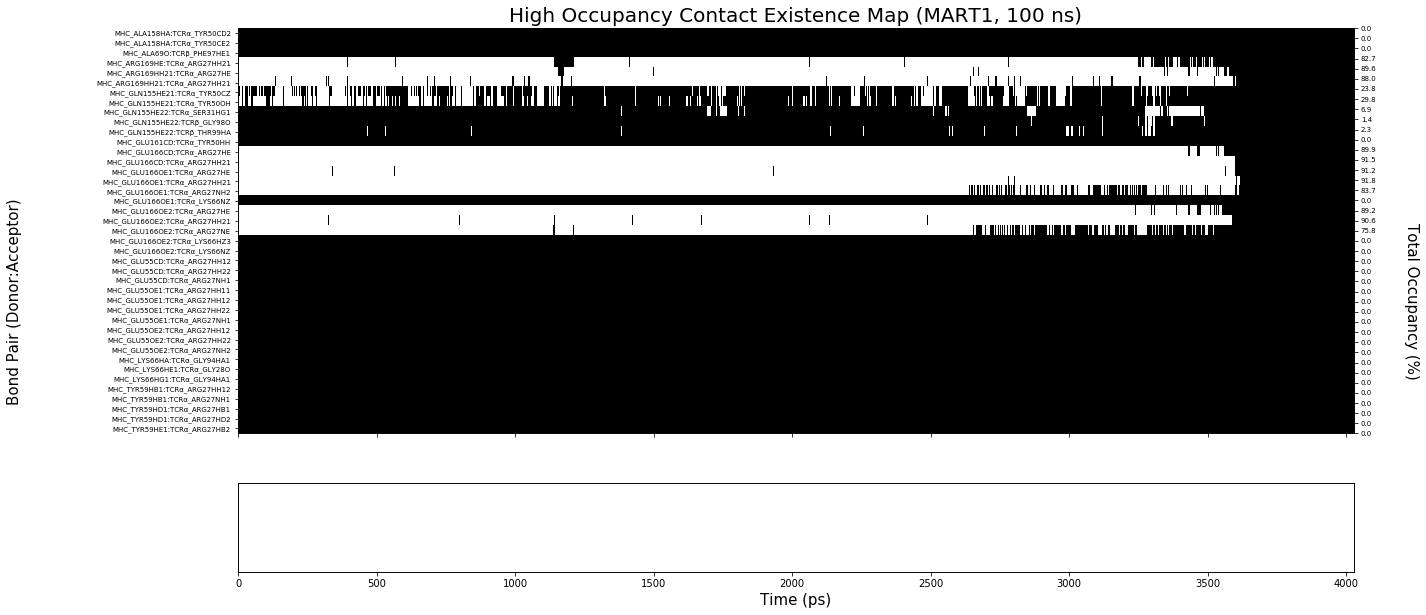

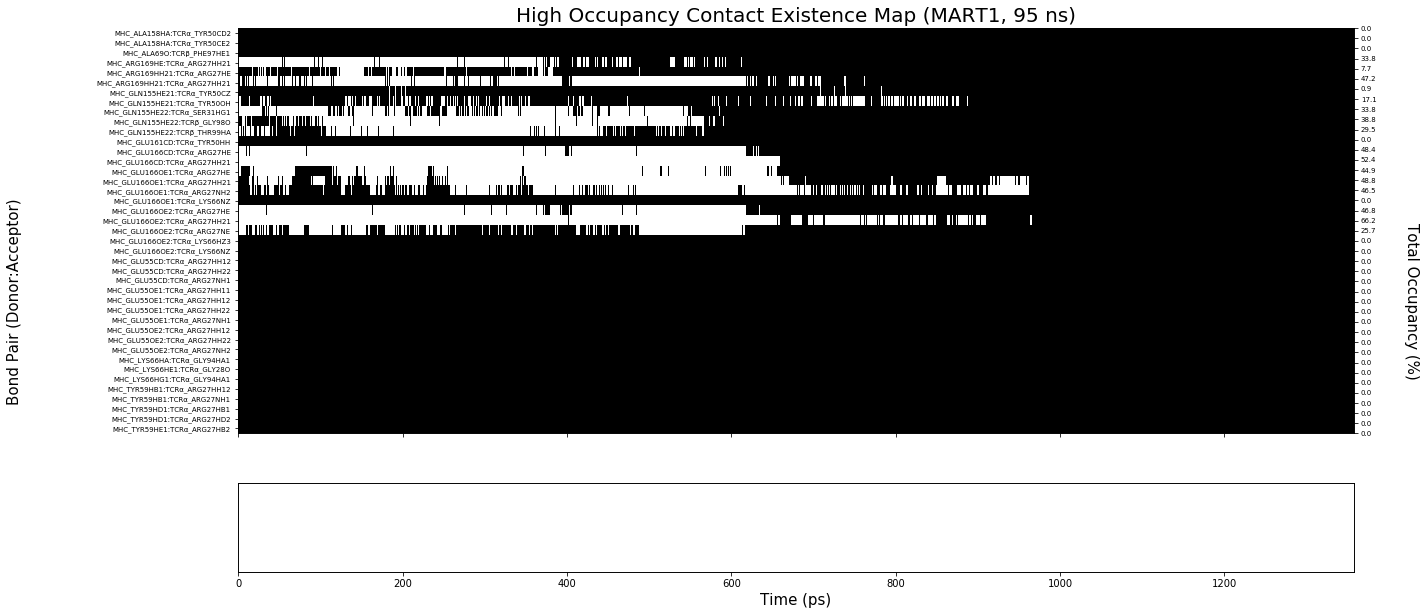

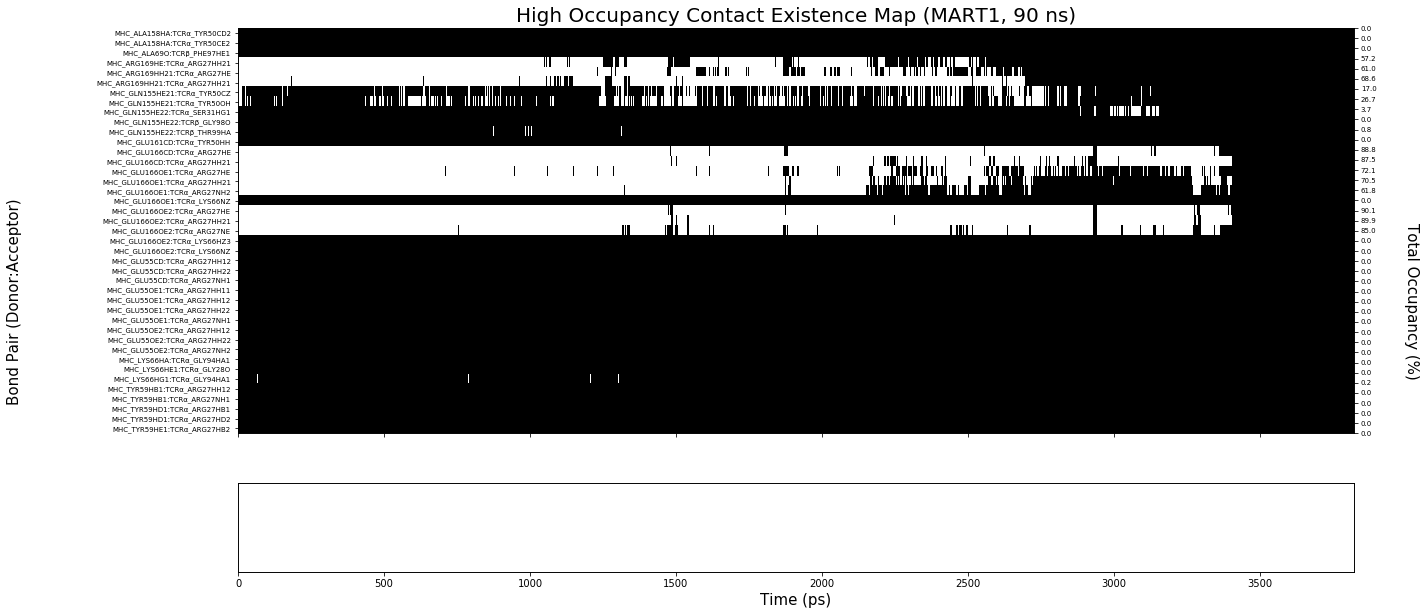

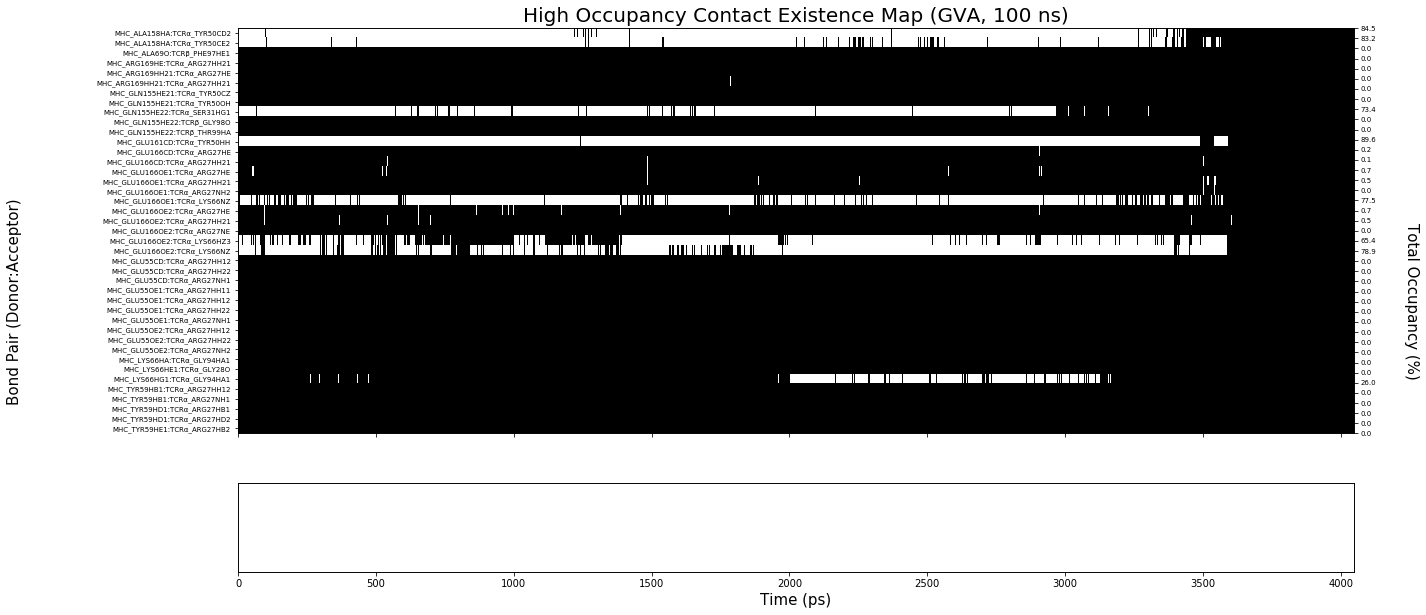

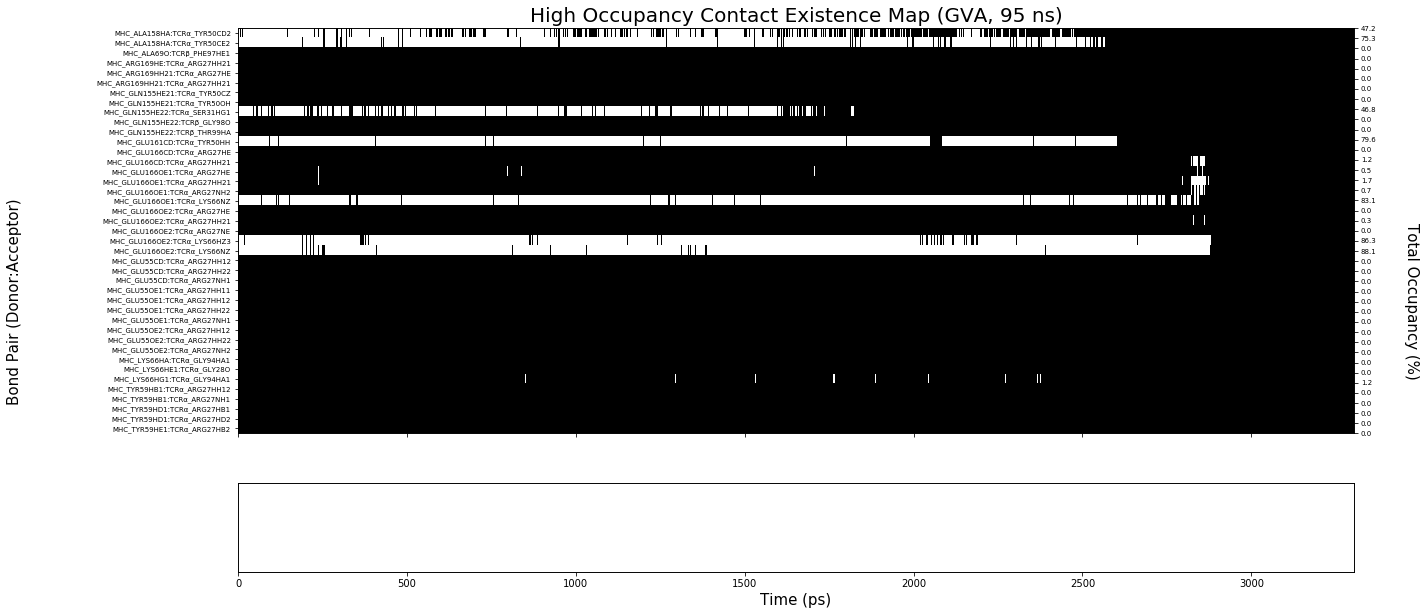

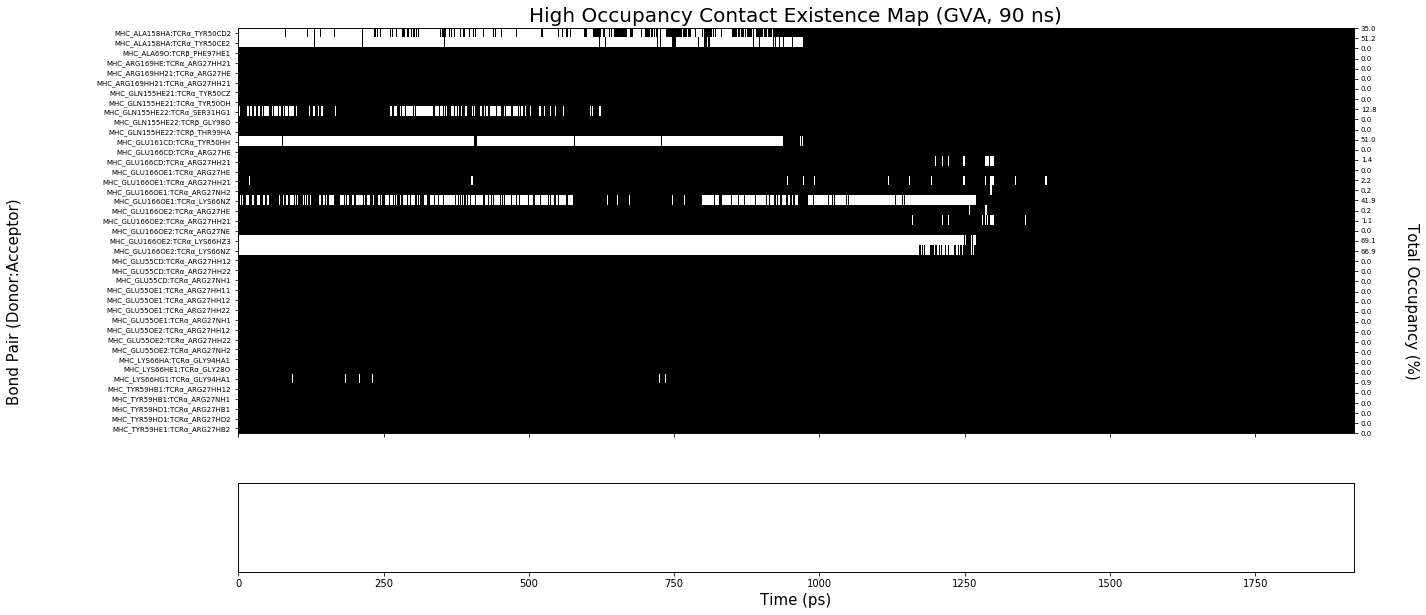

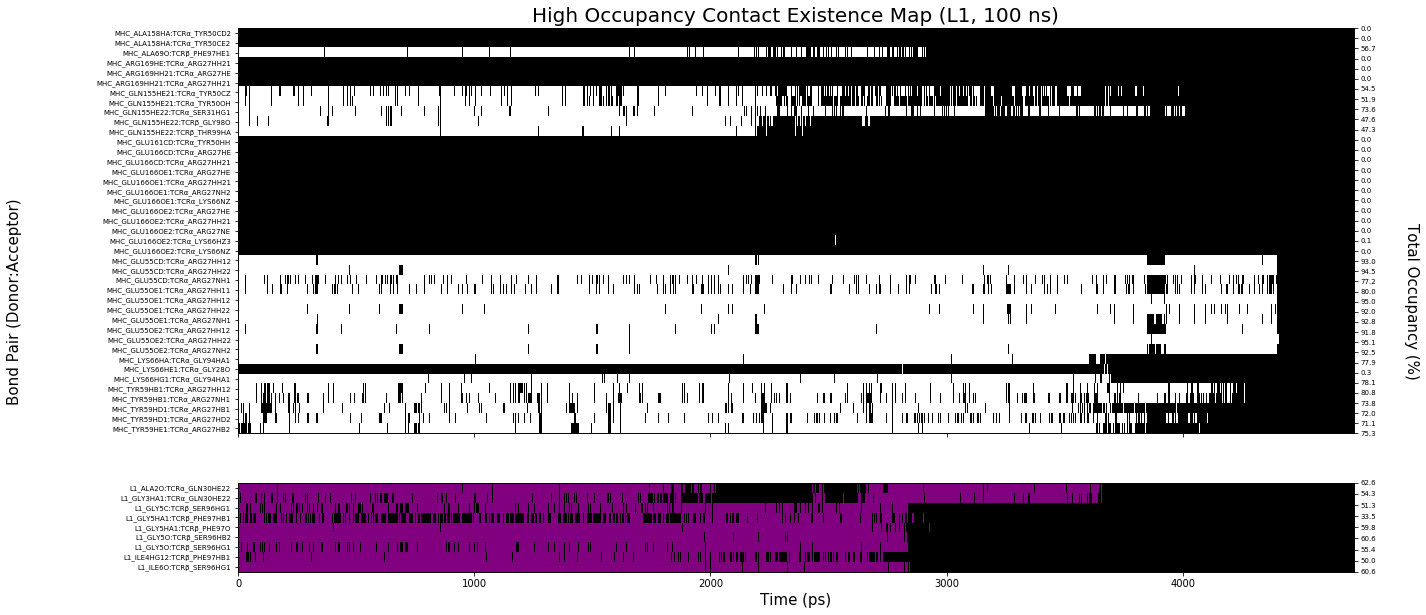

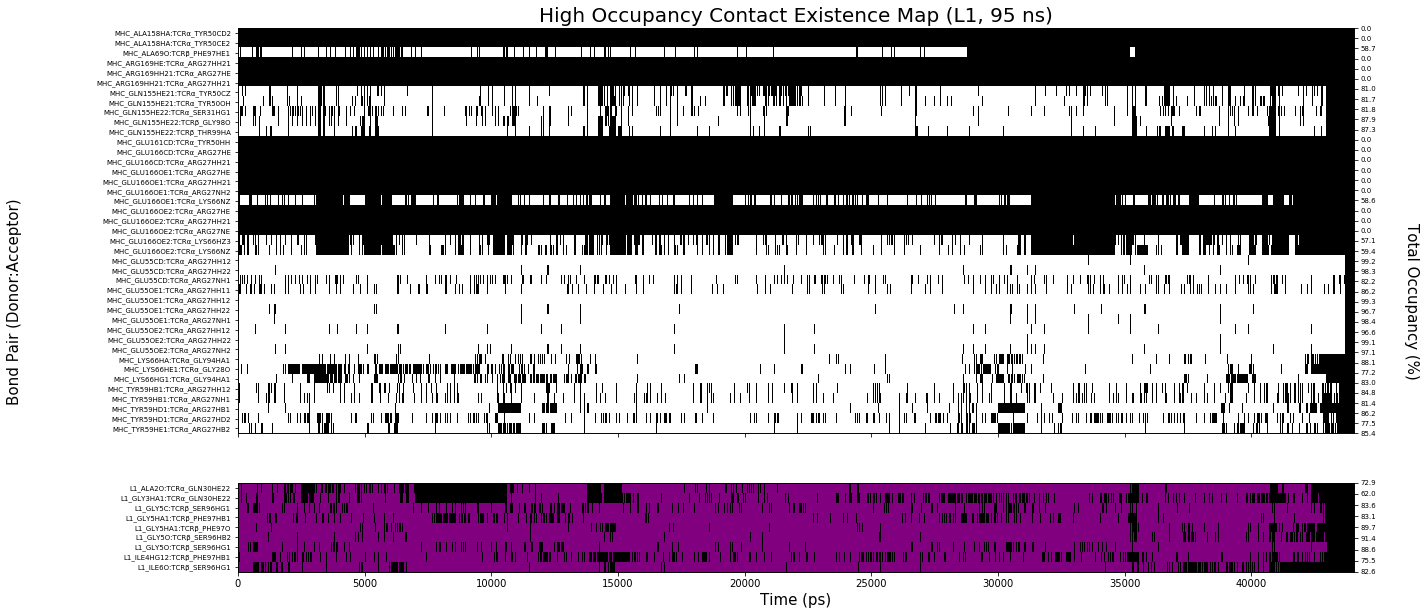

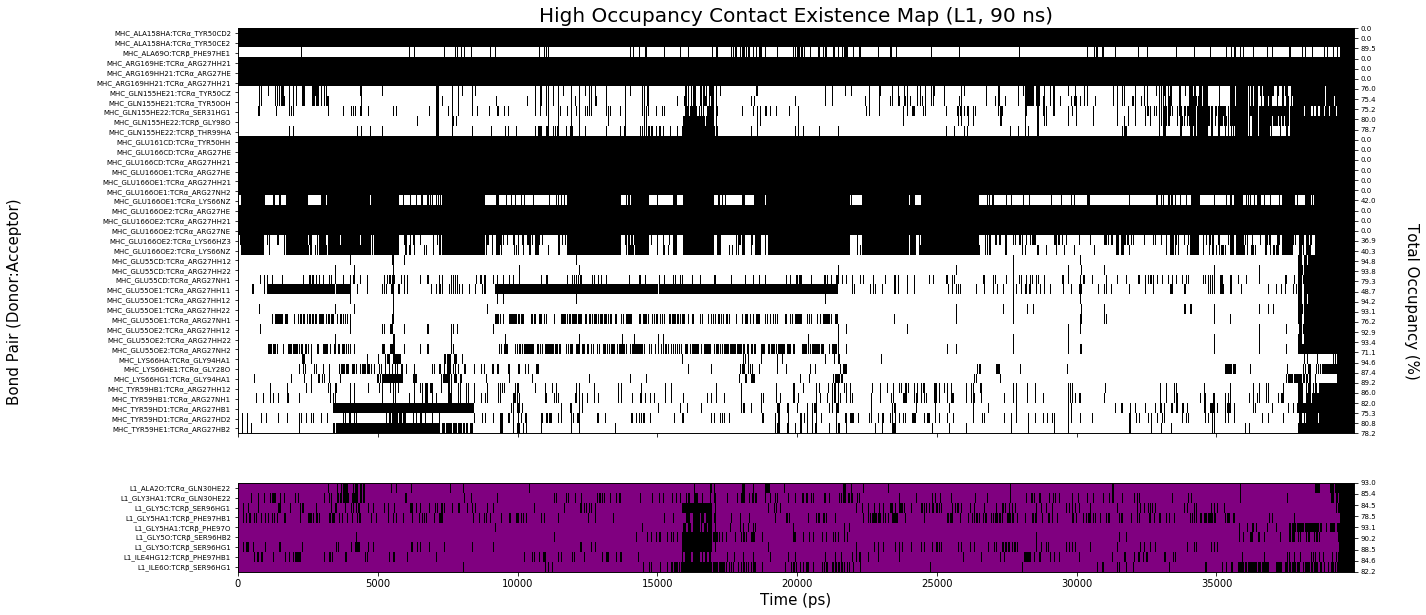

In [34]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

#Let's map it up, homie!

M1_100 = pd.read_excel(r'/Users/zrollins/Box/DMF5_MART1/M1+/100/cmap.xlsx', index_col = 0)
M1_95 = pd.read_excel(r'/Users/zrollins/Box/DMF5_MART1/M1+/95/cmap.xlsx', index_col = 0)
M1_90 = pd.read_excel(r'/Users/zrollins/Box/DMF5_MART1/M1+/90/cmap.xlsx', index_col = 0)
                      
GVA_100 = pd.read_excel(r'/Users/zrollins/Box/DMF5_MART1/GVA+/100/cmap.xlsx', index_col = 0)
GVA_95 = pd.read_excel(r'/Users/zrollins/Box/DMF5_MART1/GVA+/95/cmap.xlsx', index_col = 0)         
GVA_90 = pd.read_excel(r'/Users/zrollins/Box/DMF5_MART1/GVA+/90/cmap.xlsx', index_col = 0)
                       
L1_100 = pd.read_excel(r'/Users/zrollins/Box/DMF5_MART1/L1+/100/cmap.xlsx', index_col = 0)
L1_95 = pd.read_csv(r'/Users/zrollins/Box/DMF5_MART1/L1+/95/cmap.csv', sep=str('\t'), index_col = 0, header=None)
L1_90 = pd.read_csv(r'/Users/zrollins/Box/DMF5_MART1/L1+/90/cmap.csv', sep=str('\t'), index_col = 0, header=None)

#High Occupancy (>80%)
M1_100['Total Occupancy (%)'] = M1_100.mean(axis=1).round(decimals=3)
M1_100['Total Occupancy (%)'] = 100*M1_100['Total Occupancy (%)']
M1_100_5 = M1_100[M1_100['Total Occupancy (%)']> 80]

M1_95['Total Occupancy (%)'] = M1_95.mean(axis=1).round(decimals=3)
M1_95['Total Occupancy (%)'] = 100*M1_95['Total Occupancy (%)']
M1_95_5 = M1_95[M1_95['Total Occupancy (%)']> 80]

M1_90['Total Occupancy (%)'] = M1_90.mean(axis=1).round(decimals=3)
M1_90['Total Occupancy (%)'] = 100*M1_90['Total Occupancy (%)']
M1_90_5 = M1_90[M1_90['Total Occupancy (%)']>80]

GVA_100['Total Occupancy (%)'] = GVA_100.mean(axis=1).round(decimals=3)
GVA_100['Total Occupancy (%)'] = 100*GVA_100['Total Occupancy (%)']
GVA_100_5 = GVA_100[GVA_100['Total Occupancy (%)']> 80]

GVA_95['Total Occupancy (%)'] = GVA_95.mean(axis=1).round(decimals=3)
GVA_95['Total Occupancy (%)'] = 100*GVA_95['Total Occupancy (%)']
GVA_95_5 = GVA_95[GVA_95['Total Occupancy (%)']> 80]

GVA_90['Total Occupancy (%)'] = GVA_90.mean(axis=1).round(decimals=3)
GVA_90['Total Occupancy (%)'] = 100*GVA_90['Total Occupancy (%)']
GVA_90_5 = GVA_90[GVA_90['Total Occupancy (%)']>80]

L1_100['Total Occupancy (%)'] = L1_100.mean(axis=1).round(decimals=3)
L1_100['Total Occupancy (%)'] = 100*L1_100['Total Occupancy (%)']
L1_100_5 = L1_100[L1_100['Total Occupancy (%)']> 80]

L1_95['Total Occupancy (%)'] = L1_95.mean(axis=1).round(decimals=3)
L1_95['Total Occupancy (%)'] = 100*L1_95['Total Occupancy (%)']
L1_95_5 = L1_95[L1_95['Total Occupancy (%)']> 80]

L1_90['Total Occupancy (%)'] = L1_90.mean(axis=1).round(decimals=3)
L1_90['Total Occupancy (%)'] = 100*L1_90['Total Occupancy (%)']
L1_90_5 = L1_90[L1_90['Total Occupancy (%)']>80]

#Indices
ndx_M100 = pd.Index(M1_100_5.index.tolist())
ndx_M95 = pd.Index(M1_95_5.index.tolist())
ndx_M90 = pd.Index(M1_90_5.index.tolist())

ndx_GVA100 = pd.Index(GVA_100_5.index.tolist())
ndx_GVA95 = pd.Index(GVA_95_5.index.tolist())
ndx_GVA90 = pd.Index(GVA_90_5.index.tolist())

ndx_L1100 = pd.Index(L1_100_5.index.tolist())
ndx_L195 = pd.Index(L1_95_5.index.tolist())
ndx_L190 = pd.Index(L1_90_5.index.tolist())

#Intra-Mutant Common Indices

###MART1###

#M1 Common Index
M1_100_95= ndx_M95.difference(ndx_M100, sort=False).tolist()
M1_100_90= ndx_M90.difference(ndx_M100, sort=False).tolist()
M1_100_diff = list(set(M1_100_95+M1_100_90))
M1_95_100 = ndx_M100.difference(ndx_M95, sort=False).tolist()
M1_95_90 = ndx_M90.difference(ndx_M95, sort=False).tolist()
M1_95_diff = list(set(M1_95_100+M1_95_90)) 
M1_90_100 = ndx_M100.difference(ndx_M90, sort=False).tolist()
M1_90_95 = ndx_M95.difference(ndx_M90, sort=False).tolist()
M1_90_diff = list(set(M1_90_100+M1_90_95))

##M1 Common Index Addition Loops##

#Add index differences to 100 ns
for i in range(len(M1_100_diff)):
    for j in range(len (M1_100.index.tolist())):
        if M1_100_diff[i] == M1_100.index.tolist()[j]:
            M1_100_5 = M1_100_5.append(M1_100.iloc[j])
            break
        if  j == len (M1_100.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(M1_100.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [M1_100_diff[i]])
                M1_100_5 = M1_100_5.append(zero)
M1_100_5['Total Occupancy (%)'] = 100*M1_100_5.mean(axis=1).round(decimals=3)
M1_100_5 = M1_100_5.sort_index(axis=0, ascending=True)

#Add index differences to 95 ns
for i in range(len(M1_95_diff)):
    for j in range(len (M1_95.index.tolist())):
        if M1_95_diff[i] == M1_95.index.tolist()[j]:
            M1_95_5 = M1_95_5.append(M1_95.iloc[j])
            break
        if  j == len (M1_95.index.tolist())-1:
            add_zeros = np.zeros(shape=(1, len(M1_95.columns)-1))
            zero = pd.DataFrame(add_zeros, index = [M1_95_diff[i]])
            M1_95_5 = M1_95_5.append(zero)
            break
M1_95_5['Total Occupancy (%)'] = 100*M1_95_5.mean(axis=1).round(decimals=3)
M1_95_5 = M1_95_5.sort_index(axis=0, ascending=True)

#Add index differences to 90 ns
for i in range(len(M1_90_diff)):
    for j in range(len (M1_90.index.tolist())):
        if M1_90_diff[i] == M1_90.index.tolist()[j]:
            M1_90_5 = M1_90_5.append(M1_90.iloc[j])
            break
        if  j == len (M1_90.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(M1_90.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [M1_90_diff[i]])
                M1_90_5 = M1_90_5.append(zero)           
M1_90_5['Total Occupancy (%)'] = 100*M1_90_5.mean(axis=1).round(decimals=3)
M1_90_5 = M1_90_5.sort_index(axis=0, ascending=True)

###GVA###

#GVA Common Index
GVA_100_95= ndx_GVA95.difference(ndx_GVA100, sort=False).tolist()
GVA_100_90= ndx_GVA90.difference(ndx_GVA100, sort=False).tolist()
GVA_100_diff = list(set(GVA_100_95+GVA_100_90))
GVA_95_100 = ndx_GVA100.difference(ndx_GVA95, sort=False).tolist()
GVA_95_90 = ndx_GVA90.difference(ndx_GVA95, sort=False).tolist()
GVA_95_diff = list(set(GVA_95_100+GVA_95_90)) 
GVA_90_100 = ndx_GVA100.difference(ndx_GVA90, sort=False).tolist()
GVA_90_95 = ndx_GVA95.difference(ndx_GVA90, sort=False).tolist()
GVA_90_diff = list(set(GVA_90_100+GVA_90_95))

##GVA Common Index Addition Loops##

#Add index differences to 100 ns
for i in range(len(GVA_100_diff)):
    for j in range(len (GVA_100.index.tolist())):
        if GVA_100_diff[i] == GVA_100.index.tolist()[j]:
            GVA_100_5 = GVA_100_5.append(GVA_100.iloc[j])
            break
        if  j == len (GVA_100.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(GVA_100.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [GVA_100_diff[i]])
                GVA_100_5 = GVA_100_5.append(zero)
GVA_100_5['Total Occupancy (%)'] = 100*GVA_100_5.mean(axis=1).round(decimals=3)
GVA_100_5 = GVA_100_5.sort_index(axis=0, ascending=True)

#Add index differences to 95 ns
for i in range(len(GVA_95_diff)):
    for j in range(len (GVA_95.index.tolist())):
        if GVA_95_diff[i] == GVA_95.index.tolist()[j]:
            GVA_95_5 = GVA_95_5.append(GVA_95.iloc[j])
            break
        if  j == len (GVA_95.index.tolist())-1:
            add_zeros = np.zeros(shape=(1, len(GVA_95.columns)-1))
            zero = pd.DataFrame(add_zeros, index = [GVA_95_diff[i]])
            GVA_95_5 = GVA_95_5.append(zero)
            break
GVA_95_5['Total Occupancy (%)'] = 100*GVA_95_5.mean(axis=1).round(decimals=3)
GVA_95_5 = GVA_95_5.sort_index(axis=0, ascending=True)

#Add index differences to 90 ns
for i in range(len(GVA_90_diff)):
    for j in range(len (GVA_90.index.tolist())):
        if GVA_90_diff[i] == GVA_90.index.tolist()[j]:
            GVA_90_5 = GVA_90_5.append(GVA_90.iloc[j])
            break
        if  j == len (GVA_90.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(GVA_90.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [GVA_90_diff[i]])
                GVA_90_5 = GVA_90_5.append(zero)           
GVA_90_5['Total Occupancy (%)'] = 100*GVA_90_5.mean(axis=1).round(decimals=3)
GVA_90_5 = GVA_90_5.sort_index(axis=0, ascending=True)


###L1###

#L1 Common Index
L1_100_95= ndx_L195.difference(ndx_L1100, sort=False).tolist()
L1_100_90= ndx_L190.difference(ndx_L1100, sort=False).tolist()
L1_100_diff = list(set(L1_100_95+L1_100_90))
L1_95_100 = ndx_L1100.difference(ndx_L195, sort=False).tolist()
L1_95_90 = ndx_L190.difference(ndx_L195, sort=False).tolist()
L1_95_diff = list(set(L1_95_100+L1_95_90)) 
L1_90_100 = ndx_L1100.difference(ndx_L190, sort=False).tolist()
L1_90_95 = ndx_L195.difference(ndx_L190, sort=False).tolist()
L1_90_diff = list(set(L1_90_100+L1_90_95))

##L1 Common Index Addition Loops##

#Add index differences to 100 ns
for i in range(len(L1_100_diff)):
    for j in range(len (L1_100.index.tolist())):
        if L1_100_diff[i] == L1_100.index.tolist()[j]:
            L1_100_5 = L1_100_5.append(L1_100.iloc[j])
            break
        if  j == len (L1_100.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(L1_100.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [L1_100_diff[i]])
                L1_100_5 = L1_100_5.append(zero)
L1_100_5['Total Occupancy (%)'] = 100*L1_100_5.mean(axis=1).round(decimals=3)
L1_100_5 = L1_100_5.sort_index(axis=0, ascending=True)

#Add index differences to 95 ns
for i in range(len(L1_95_diff)):
    for j in range(len (L1_95.index.tolist())):
        if L1_95_diff[i] == L1_95.index.tolist()[j]:
            L1_95_5 = L1_95_5.append(L1_95.iloc[j])
            break
        if  j == len (L1_95.index.tolist())-1:
            add_zeros = np.zeros(shape=(1, len(L1_95.columns)-1))
            zero = pd.DataFrame(add_zeros, index = [L1_95_diff[i]])
            L1_95_5 = L1_95_5.append(zero)
            break
L1_95_5['Total Occupancy (%)'] = 100*L1_95_5.mean(axis=1).round(decimals=3)
L1_95_5 = L1_95_5.sort_index(axis=0, ascending=True)

#Add index differences to 90 ns
for i in range(len(L1_90_diff)):
    for j in range(len (L1_90.index.tolist())):
        if L1_90_diff[i] == L1_90.index.tolist()[j]:
            L1_90_5 = L1_90_5.append(L1_90.iloc[j])
            break
        if  j == len (L1_90.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(L1_90.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [L1_90_diff[i]])
                L1_90_5 = L1_90_5.append(zero)           
L1_90_5['Total Occupancy (%)'] = 100*L1_90_5.mean(axis=1).round(decimals=3)
L1_90_5 = L1_90_5.sort_index(axis=0, ascending=True)

#Inter-Mutant Common Indices

#Indices
ndx_M100 = pd.Index(M1_100_5.index.tolist())
ndx_GVA100 = pd.Index(GVA_100_5.index.tolist())
ndx_L1100 = pd.Index(L1_100_5.index.tolist())

#Total Common Index
M1_L1= ndx_L1100.difference(ndx_M100, sort=False).tolist()
M1_GVA= ndx_GVA100.difference(ndx_M100, sort=False).tolist()
M1_diff= list(set(M1_L1 + M1_GVA))

GVA_M1= ndx_M100.difference(ndx_GVA100, sort=False).tolist()
GVA_L1= ndx_L1100.difference(ndx_GVA100, sort=False).tolist()
GVA_diff= list(set(GVA_M1 + GVA_L1))

L1_M1  = ndx_M100.difference(ndx_L1100, sort=False).tolist()
L1_GVA = ndx_GVA100.difference(ndx_L1100, sort=False).tolist()
L1_diff= list(set(L1_M1 + L1_GVA))


###MART1 Inter-Mutant Common Index Addition Loops###
                
#MART1 100 ns
for i in range(len(M1_diff)):
    for j in range(len (M1_100.index.tolist())):
        if M1_diff[i] == M1_100.index.tolist()[j]:
            M1_100_5 = M1_100_5.append(M1_100.iloc[j])
            break
        if  j == len (M1_100.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(M1_100.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [M1_diff[i]])
                M1_100_5 = M1_100_5.append(zero)
M1_100_5['Total Occupancy (%)'] = 100*M1_100_5.mean(axis=1).round(decimals=3)
M1_100_5 = M1_100_5.sort_index(axis=0, ascending=True)

#MART1 95 ns
for i in range(len(M1_diff)):
    for j in range(len (M1_95.index.tolist())):
        if M1_diff[i] == M1_95.index.tolist()[j]:
            M1_95_5 = M1_95_5.append(M1_95.iloc[j])
            break
        if  j == len (M1_95.index.tolist())-1:
            add_zeros = np.zeros(shape=(1, len(M1_95.columns)-1))
            zero = pd.DataFrame(add_zeros, index = [M1_diff[i]])
            M1_95_5 = M1_95_5.append(zero)
            break
M1_95_5['Total Occupancy (%)'] = 100*M1_95_5.mean(axis=1).round(decimals=3)
M1_95_5 = M1_95_5.sort_index(axis=0, ascending=True)

#MART1 90 ns
for i in range(len(M1_diff)):
    for j in range(len (M1_90.index.tolist())):
        if M1_diff[i] == M1_90.index.tolist()[j]:
            M1_90_5 = M1_90_5.append(M1_90.iloc[j])
            break
        if  j == len (M1_90.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(M1_90.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [M1_diff[i]])
                M1_90_5 = M1_90_5.append(zero)           
M1_90_5['Total Occupancy (%)'] = 100*M1_90_5.mean(axis=1).round(decimals=3)
M1_90_5 = M1_90_5.sort_index(axis=0, ascending=True)
               
###GVA Inter-Mutant Common Index Addition Loops###
                
#GVA 100 ns
for i in range(len(GVA_diff)):
    for j in range(len (GVA_100.index.tolist())):
        if GVA_diff[i] == GVA_100.index.tolist()[j]:
            GVA_100_5 = GVA_100_5.append(GVA_100.iloc[j])
            break
        if  j == len (GVA_100.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(GVA_100.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [GVA_diff[i]])
                GVA_100_5 = GVA_100_5.append(zero)
GVA_100_5['Total Occupancy (%)'] = 100*GVA_100_5.mean(axis=1).round(decimals=3)
GVA_100_5 = GVA_100_5.sort_index(axis=0, ascending=True)

#GVA 95 ns
for i in range(len(GVA_diff)):
    for j in range(len (GVA_95.index.tolist())):
        if GVA_diff[i] == GVA_95.index.tolist()[j]:
            GVA_95_5 = GVA_95_5.append(GVA_95.iloc[j])
            break
        if  j == len (GVA_95.index.tolist())-1:
            add_zeros = np.zeros(shape=(1, len(GVA_95.columns)-1))
            zero = pd.DataFrame(add_zeros, index = [GVA_diff[i]])
            GVA_95_5 = GVA_95_5.append(zero)
            break
GVA_95_5['Total Occupancy (%)'] = 100*GVA_95_5.mean(axis=1).round(decimals=3)
GVA_95_5 = GVA_95_5.sort_index(axis=0, ascending=True)

#GVA 90 ns
for i in range(len(GVA_diff)):
    for j in range(len (GVA_90.index.tolist())):
        if GVA_diff[i] == GVA_90.index.tolist()[j]:
            GVA_90_5 = GVA_90_5.append(GVA_90.iloc[j])
            break
        if  j == len (GVA_90.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(GVA_90.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [GVA_diff[i]])
                GVA_90_5 = GVA_90_5.append(zero)           
GVA_90_5['Total Occupancy (%)'] = 100*GVA_90_5.mean(axis=1).round(decimals=3)
GVA_90_5 = GVA_90_5.sort_index(axis=0, ascending=True)

                
###L1 Inter-Mutant Common Index Addition Loops### 
                
#L1 100 ns
for i in range(len(L1_diff)):
    for j in range(len (L1_100.index.tolist())):
        if L1_diff[i] == L1_100.index.tolist()[j]:
            L1_100_5 = L1_100_5.append(L1_100.iloc[j])
            break
        if  j == len (L1_100.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(L1_100.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [L1_diff[i]])
                L1_100_5 = L1_100_5.append(zero)
L1_100_5['Total Occupancy (%)'] = 100*L1_100_5.mean(axis=1).round(decimals=3)
L1_100_5 = L1_100_5.sort_index(axis=0, ascending=True)

#L1 95 ns
for i in range(len(L1_diff)):
    for j in range(len (L1_95.index.tolist())):
        if L1_diff[i] == L1_95.index.tolist()[j]:
            L1_95_5 = L1_95_5.append(L1_95.iloc[j])
            break
        if  j == len (L1_95.index.tolist())-1:
            add_zeros = np.zeros(shape=(1, len(L1_95.columns)-1))
            zero = pd.DataFrame(add_zeros, index = [L1_diff[i]])
            L1_95_5 = L1_95_5.append(zero)
            break
L1_95_5['Total Occupancy (%)'] = 100*L1_95_5.mean(axis=1).round(decimals=3)
L1_95_5 = L1_95_5.sort_index(axis=0, ascending=True)

#L1 90 ns
for i in range(len(L1_diff)):
    for j in range(len (L1_90.index.tolist())):
        if L1_diff[i] == L1_90.index.tolist()[j]:
            L1_90_5 = L1_90_5.append(L1_90.iloc[j])
            break
        if  j == len (L1_90.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(L1_90.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [L1_diff[i]])
                L1_90_5 = L1_90_5.append(zero)           
L1_90_5['Total Occupancy (%)'] = 100*L1_90_5.mean(axis=1).round(decimals=3)
L1_90_5 = L1_90_5.sort_index(axis=0, ascending=True)      
                
                
###PLOTTING###
                
FS=7                
###MART1###
#Plot MART1 100 ns
MHC_100 = M1_100_5[M1_100_5.index.str.contains('MHC')]
MHC_100_ocpy = pd.DataFrame()
MHC_100_ocpy['Total Occupancy (%)'] = MHC_100['Total Occupancy (%)']
MHC_100 = MHC_100.drop('Total Occupancy (%)', axis=1)
MHC_rows, MHC_cols = MHC_100.shape

pep_100 = M1_100_5[M1_100_5.index.str.contains('MART1')]
pep_100_ocpy = pd.DataFrame()
pep_100_ocpy['Total Occupancy (%)'] = pep_100['Total Occupancy (%)']
pep_100 = pep_100.drop('Total Occupancy (%)', axis=1)
pep_rows, pep_cols = pep_100.shape
                
fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,9]})
ax[0].imshow(MHC_100,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_100.index)))
ax[0].set_yticklabels(MHC_100.index, fontsize=FS)
ax[0].set_title('High Occupancy Contact Existence Map (MART1, 100 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_100_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_100_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

cmap = colors.ListedColormap(['black','magenta'])
boundaries = [0,1]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

ax[1].imshow(pep_100,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_100.index)))
ax[1].set_yticklabels(pep_100.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_100_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_100_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Box/DMF5_MART1/M1+/100/contact_occupancy.png', bbox_inches='tight', dpi=300)

#Plot MART1 95 ns
MHC_95 = M1_95_5[M1_95_5.index.str.contains('MHC')]
MHC_95_ocpy = pd.DataFrame()
MHC_95_ocpy['Total Occupancy (%)'] = MHC_95['Total Occupancy (%)']
MHC_95 = MHC_95.drop('Total Occupancy (%)', axis=1)

pep_95 = M1_95_5[M1_95_5.index.str.contains('MART1')]
pep_95_ocpy = pd.DataFrame()
pep_95_ocpy['Total Occupancy (%)'] = pep_95['Total Occupancy (%)']
pep_95 = pep_95.drop('Total Occupancy (%)', axis=1)

fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,9]})
ax[0].imshow(MHC_95,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_95.index)))
ax[0].set_yticklabels(MHC_95.index, fontsize=FS)
ax[0].set_title('High Occupancy Contact Existence Map (MART1, 95 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_95_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_95_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)


ax[1].imshow(pep_95,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_95.index)))
ax[1].set_yticklabels(pep_95.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_95_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_95_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Box/DMF5_MART1/M1+/95/contact_occupancy.png', bbox_inches='tight', dpi=300)

#Plot MART1 90 ns
MHC_90 = M1_90_5[M1_90_5.index.str.contains('MHC')]
MHC_90_ocpy = pd.DataFrame()
MHC_90_ocpy['Total Occupancy (%)'] = MHC_90['Total Occupancy (%)']
MHC_90 = MHC_90.drop('Total Occupancy (%)', axis=1)

pep_90 = M1_90_5[M1_90_5.index.str.contains('MART1')]
pep_90_ocpy = pd.DataFrame()
pep_90_ocpy['Total Occupancy (%)'] = pep_90['Total Occupancy (%)']
pep_90 = pep_90.drop('Total Occupancy (%)', axis=1)

fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,9]})
ax[0].imshow(MHC_90,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_90.index)))
ax[0].set_yticklabels(MHC_90.index, fontsize=FS)
ax[0].set_title('High Occupancy Contact Existence Map (MART1, 90 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_90_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_90_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)


ax[1].imshow(pep_90,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_90.index)))
ax[1].set_yticklabels(pep_90.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_90_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_90_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Box/DMF5_MART1/M1+/90/contact_occupancy.png', bbox_inches='tight', dpi=300)
                
                
###GVA###
                
#Plot GVA 100 ns

MHC_100 = GVA_100_5[GVA_100_5.index.str.contains('MHC')]
MHC_100_ocpy = pd.DataFrame()
MHC_100_ocpy['Total Occupancy (%)'] = MHC_100['Total Occupancy (%)']
MHC_100 = MHC_100.drop('Total Occupancy (%)', axis=1)
MHC_rows, MHC_cols = MHC_100.shape

                
pep_100 = GVA_100_5[GVA_100_5.index.str.contains('GVA')]
pep_100_ocpy = pd.DataFrame()
pep_100_ocpy['Total Occupancy (%)'] = pep_100['Total Occupancy (%)']
pep_100 = pep_100.drop('Total Occupancy (%)', axis=1)
pep_rows, pep_cols = pep_100.shape
                
fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,9]})
ax[0].imshow(MHC_100,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_100.index)))
ax[0].set_yticklabels(MHC_100.index, fontsize=FS)
ax[0].set_title('High Occupancy Contact Existence Map (GVA, 100 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_100_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_100_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

cmap = colors.ListedColormap(['black','orange'])
boundaries = [0,1]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

ax[1].imshow(pep_100,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_100.index)))
ax[1].set_yticklabels(pep_100.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_100_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_100_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Box/DMF5_MART1/GVA+/100/contact_occupancy.png', bbox_inches='tight', dpi=300)

#Plot GVA 95 ns
MHC_95 = GVA_95_5[GVA_95_5.index.str.contains('MHC')]
MHC_95_ocpy = pd.DataFrame()
MHC_95_ocpy['Total Occupancy (%)'] = MHC_95['Total Occupancy (%)']
MHC_95 = MHC_95.drop('Total Occupancy (%)', axis=1)

pep_95 = GVA_95_5[GVA_95_5.index.str.contains('GVA')]
pep_95_ocpy = pd.DataFrame()
pep_95_ocpy['Total Occupancy (%)'] = pep_95['Total Occupancy (%)']
pep_95 = pep_95.drop('Total Occupancy (%)', axis=1)

fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,9]})
ax[0].imshow(MHC_95,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_95.index)))
ax[0].set_yticklabels(MHC_95.index, fontsize=FS)
ax[0].set_title('High Occupancy Contact Existence Map (GVA, 95 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_95_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_95_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)


ax[1].imshow(pep_95,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_95.index)))
ax[1].set_yticklabels(pep_95.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_95_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_95_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Box/DMF5_MART1/GVA+/95/contact_occupancy.png', bbox_inches='tight', dpi=300)

#Plot GVA 90 ns
MHC_90 = GVA_90_5[GVA_90_5.index.str.contains('MHC')]
MHC_90_ocpy = pd.DataFrame()
MHC_90_ocpy['Total Occupancy (%)'] = MHC_90['Total Occupancy (%)']
MHC_90 = MHC_90.drop('Total Occupancy (%)', axis=1)

pep_90 = GVA_90_5[GVA_90_5.index.str.contains('GVA')]
pep_90_ocpy = pd.DataFrame()
pep_90_ocpy['Total Occupancy (%)'] = pep_90['Total Occupancy (%)']
pep_90 = pep_90.drop('Total Occupancy (%)', axis=1)

print(GVA_100_5.shape)
print(GVA_95_5.shape)
print(GVA_90_5.shape)
print(MHC_90.shape)
print(pep_90.shape)

fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,9]})
ax[0].imshow(MHC_90,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_90.index)))
ax[0].set_yticklabels(MHC_90.index, fontsize=FS)
ax[0].set_title('High Occupancy Contact Existence Map (GVA, 90 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_90_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_90_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)


ax[1].imshow(pep_90,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_90.index)))
ax[1].set_yticklabels(pep_90.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_90_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_90_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Box/DMF5_MART1/GVA+/90/contact_occupancy.png', bbox_inches='tight', dpi=300)
                
###L1###
                

#Plot L1 100 ns
MHC_100 = L1_100_5[L1_100_5.index.str.contains('MHC')]
MHC_100_ocpy = pd.DataFrame()
MHC_100_ocpy['Total Occupancy (%)'] = MHC_100['Total Occupancy (%)']
MHC_100 = MHC_100.drop('Total Occupancy (%)', axis=1)
MHC_rows, MHC_cols = MHC_100.shape

pep_100 = L1_100_5[L1_100_5.index.str.contains('L1')]
pep_100_ocpy = pd.DataFrame()
pep_100_ocpy['Total Occupancy (%)'] = pep_100['Total Occupancy (%)']
pep_100 = pep_100.drop('Total Occupancy (%)', axis=1)
pep_rows, pep_cols = pep_100.shape
                
fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
ax[0].imshow(MHC_100,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_100.index)))
ax[0].set_yticklabels(MHC_100.index, fontsize=FS)
ax[0].set_title('High Occupancy Contact Existence Map (L1, 100 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_100_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_100_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

cmap = colors.ListedColormap(['black','purple'])
boundaries = [0,1]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

ax[1].imshow(pep_100,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_100.index)))
ax[1].set_yticklabels(pep_100.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_100_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_100_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Box/DMF5_MART1/L1+/100/contact_occupancy.png', bbox_inches='tight', dpi=300)

#Plot L1 95 ns
MHC_95 = L1_95_5[L1_95_5.index.str.contains('MHC')]
MHC_95_ocpy = pd.DataFrame()
MHC_95_ocpy['Total Occupancy (%)'] = MHC_95['Total Occupancy (%)']
MHC_95 = MHC_95.drop('Total Occupancy (%)', axis=1)

pep_95 = L1_95_5[L1_95_5.index.str.contains('L1')]
pep_95_ocpy = pd.DataFrame()
pep_95_ocpy['Total Occupancy (%)'] = pep_95['Total Occupancy (%)']
pep_95 = pep_95.drop('Total Occupancy (%)', axis=1)

fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
ax[0].imshow(MHC_95,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_95.index)))
ax[0].set_yticklabels(MHC_95.index, fontsize=FS)
ax[0].set_title('High Occupancy Contact Existence Map (L1, 95 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_95_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_95_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)


ax[1].imshow(pep_95,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_95.index)))
ax[1].set_yticklabels(pep_95.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_95_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_95_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Box/DMF5_MART1/L1+/95/contact_occupancy.png', bbox_inches='tight', dpi=300)

#Plot L1 90 ns
MHC_90 = L1_90_5[L1_90_5.index.str.contains('MHC')]
MHC_90_ocpy = pd.DataFrame()
MHC_90_ocpy['Total Occupancy (%)'] = MHC_90['Total Occupancy (%)']
MHC_90 = MHC_90.drop('Total Occupancy (%)', axis=1)

pep_90 = L1_90_5[L1_90_5.index.str.contains('L1')]
pep_90_ocpy = pd.DataFrame()
pep_90_ocpy['Total Occupancy (%)'] = pep_90['Total Occupancy (%)']
pep_90 = pep_90.drop('Total Occupancy (%)', axis=1)

print(MHC_90.shape)
print(pep_90.shape)

fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
ax[0].imshow(MHC_90,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_90.index)))
ax[0].set_yticklabels(MHC_90.index, fontsize=FS)
ax[0].set_title('High Occupancy Contact Existence Map (L1, 90 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_90_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_90_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)


ax[1].imshow(pep_90,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_90.index)))
ax[1].set_yticklabels(pep_90.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_90_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_90_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Box/DMF5_MART1/L1+/90/contact_occupancy.png', bbox_inches='tight', dpi=300)



